In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
import scipy.stats as stats
from matplotlib import colors

In [97]:
train_data = pd.read_csv("C:/Users/user/Documents/Machine Failure/train.csv", index_col=0)
train_data

Product ID Type  Air temperature [K]  Process temperature [K]  \
id                                                                     
0          L50096    L                300.6                    309.6   
1          M20343    M                302.6                    312.1   
2          L49454    L                299.3                    308.5   
3          L53355    L                301.0                    310.9   
4          M24050    M                298.0                    309.0   
...           ...  ...                  ...                      ...   
136424     M22284    M                300.1                    311.4   
136425     H38017    H                297.5                    308.5   
136426     L54690    L                300.5                    311.8   
136427     L53876    L                301.7                    310.9   
136428     L47937    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
id                                                                              
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  
id                               
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
136424    0    0    0    0    0  
136425    0    0    0    0    0  
136426    0    0    0    0    0  
136427    0    0    0    0    0  
136428    0    0    0    0    0  

[136429 rows x 13 columns]

In [73]:
test_data = pd.read_csv("C:/Users/user/Documents/Machine Failure/test.csv", index_col=0)
test_data

Product ID Type  Air temperature [K]  Process temperature [K]  \
id                                                                     
136429     L50896    L                302.3                    311.5   
136430     L53866    L                301.7                    311.0   
136431     L50498    L                301.3                    310.4   
136432     M21232    M                300.1                    309.6   
136433     M19751    M                303.4                    312.3   
...           ...  ...                  ...                      ...   
227378     L51130    L                302.3                    311.4   
227379     L47783    L                297.9                    309.8   
227380     L48097    L                295.6                    306.2   
227381     L48969    L                298.1                    307.8   
227382     L52525    L                303.5                    312.8   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
id                                                                            
136429                    1499         38.0               60    0    0    0   
136430                    1713         28.8               17    0    0    0   
136431                    1525         37.7               96    0    0    0   
136432                    1479         47.6                5    0    0    0   
136433                    1515         41.3              114    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
227378                    1484         40.4               15    0    0    0   
227379                    1542         33.8               31    0    0    0   
227380                    1501         41.4              187    0    0    0   
227381                    1534         40.3               69    0    0    0   
227382                    1534         36.1               92    0    0    0   

        OSF  RNF  
id                
136429    0    0  
136430    0    0  
136431    0    0  
136432    0    0  
136433    0    0  
...     ...  ...  
227378    0    0  
227379    0    0  
227380    0    0  
227381    0    0  
227382    0    0  

[90954 rows x 12 columns]

In [5]:
missing_value = train_data.isnull().sum()
missing_value

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
train_data.dtypes

Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [7]:
df_train = train_data.copy()
y = train_data['Machine failure']
train_data.drop(['Machine failure'],axis=1, inplace=True)
df_train

Product ID Type  Air temperature [K]  Process temperature [K]  \
id                                                                     
0          L50096    L                300.6                    309.6   
1          M20343    M                302.6                    312.1   
2          L49454    L                299.3                    308.5   
3          L53355    L                301.0                    310.9   
4          M24050    M                298.0                    309.0   
...           ...  ...                  ...                      ...   
136424     M22284    M                300.1                    311.4   
136425     H38017    H                297.5                    308.5   
136426     L54690    L                300.5                    311.8   
136427     L53876    L                301.7                    310.9   
136428     L47937    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
id                                                                              
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  
id                               
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
136424    0    0    0    0    0  
136425    0    0    0    0    0  
136426    0    0    0    0    0  
136427    0    0    0    0    0  
136428    0    0    0    0    0  

[136429 rows x 13 columns]

In [8]:
Type = pd.DataFrame(train_data['Type'])
Type

Type
id         
0         L
1         M
2         L
3         L
4         M
...     ...
136424    M
136425    H
136426    L
136427    L
136428    L

[136429 rows x 1 columns]

In [9]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(Type))
OH_cols.index = train_data.index
num_X = train_data.drop(['Type'], axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X.columns = OH_X.columns.astype(str)
OH_X

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Product ID  Air temperature [K]  Process temperature [K]  \
id                                                                
0          L50096                300.6                    309.6   
1          M20343                302.6                    312.1   
2          L49454                299.3                    308.5   
3          L53355                301.0                    310.9   
4          M24050                298.0                    309.0   
...           ...                  ...                      ...   
136424     M22284                300.1                    311.4   
136425     H38017                297.5                    308.5   
136426     L54690                300.5                    311.8   
136427     L53876                301.7                    310.9   
136428     L47937                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
id                                                                            
0                         1596         36.1              140    0    0    0   
1                         1759         29.1              200    0    0    0   
2                         1805         26.5               25    0    0    0   
3                         1524         44.3              197    0    0    0   
4                         1641         35.4               34    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
136424                    1530         37.5              210    0    0    0   
136425                    1447         49.1                2    0    0    0   
136426                    1524         38.5              214    0    0    0   
136427                    1447         46.3               42    0    0    0   
136428                    1557         39.3              229    0    0    0   

        OSF  RNF    0    1    2  
id                               
0         0    0  0.0  1.0  0.0  
1         0    0  0.0  0.0  1.0  
2         0    0  0.0  1.0  0.0  
3         0    0  0.0  1.0  0.0  
4         0    0  0.0  0.0  1.0  
...     ...  ...  ...  ...  ...  
136424    0    0  0.0  0.0  1.0  
136425    0    0  1.0  0.0  0.0  
136426    0    0  0.0  1.0  0.0  
136427    0    0  0.0  1.0  0.0  
136428    0    0  0.0  1.0  0.0  

[136429 rows x 14 columns]

In [10]:
OH_X['Product ID'] = OH_X['Product ID'].astype('category')

In [11]:
OH_X.dtypes

Product ID                 category
Air temperature [K]         float64
Process temperature [K]     float64
Rotational speed [rpm]        int64
Torque [Nm]                 float64
Tool wear [min]               int64
TWF                           int64
HDF                           int64
PWF                           int64
OSF                           int64
RNF                           int64
0                           float64
1                           float64
2                           float64
dtype: object

In [12]:
lbl = LabelEncoder()
OH_X['Product ID'] = lbl.fit_transform(OH_X['Product ID'].astype(str))
OH_X

Product ID  Air temperature [K]  Process temperature [K]  \
id                                                                 
0             2752                300.6                    309.6   
1             8620                302.6                    312.1   
2             2344                299.3                    308.5   
3             4704                301.0                    310.9   
4             9727                298.0                    309.0   
...            ...                  ...                      ...   
136424        9220                300.1                    311.4   
136425         838                297.5                    308.5   
136426        5502                300.5                    311.8   
136427        5024                301.7                    310.9   
136428        1453                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
id                                                                            
0                         1596         36.1              140    0    0    0   
1                         1759         29.1              200    0    0    0   
2                         1805         26.5               25    0    0    0   
3                         1524         44.3              197    0    0    0   
4                         1641         35.4               34    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
136424                    1530         37.5              210    0    0    0   
136425                    1447         49.1                2    0    0    0   
136426                    1524         38.5              214    0    0    0   
136427                    1447         46.3               42    0    0    0   
136428                    1557         39.3              229    0    0    0   

        OSF  RNF    0    1    2  
id                               
0         0    0  0.0  1.0  0.0  
1         0    0  0.0  0.0  1.0  
2         0    0  0.0  1.0  0.0  
3         0    0  0.0  1.0  0.0  
4         0    0  0.0  0.0  1.0  
...     ...  ...  ...  ...  ...  
136424    0    0  0.0  0.0  1.0  
136425    0    0  1.0  0.0  0.0  
136426    0    0  0.0  1.0  0.0  
136427    0    0  0.0  1.0  0.0  
136428    0    0  0.0  1.0  0.0  

[136429 rows x 14 columns]

In [13]:
OH_X.rename(columns={"Air temperature [K]":"Air temperature",
                     "Process temperature [K]":"Process temperature",
                     "Rotational speed [rpm]":"Rotational speed",
                     "Torque [Nm]":"Torque",
                     "Tool wear [min]":"Tool wear"}, inplace=True)
OH_X

Product ID  Air temperature  Process temperature  Rotational speed  \
id                                                                           
0             2752            300.6                309.6              1596   
1             8620            302.6                312.1              1759   
2             2344            299.3                308.5              1805   
3             4704            301.0                310.9              1524   
4             9727            298.0                309.0              1641   
...            ...              ...                  ...               ...   
136424        9220            300.1                311.4              1530   
136425         838            297.5                308.5              1447   
136426        5502            300.5                311.8              1524   
136427        5024            301.7                310.9              1447   
136428        1453            296.9                308.1              1557   

        Torque  Tool wear  TWF  HDF  PWF  OSF  RNF    0    1    2  
id                                                                 
0         36.1        140    0    0    0    0    0  0.0  1.0  0.0  
1         29.1        200    0    0    0    0    0  0.0  0.0  1.0  
2         26.5         25    0    0    0    0    0  0.0  1.0  0.0  
3         44.3        197    0    0    0    0    0  0.0  1.0  0.0  
4         35.4         34    0    0    0    0    0  0.0  0.0  1.0  
...        ...        ...  ...  ...  ...  ...  ...  ...  ...  ...  
136424    37.5        210    0    0    0    0    0  0.0  0.0  1.0  
136425    49.1          2    0    0    0    0    0  1.0  0.0  0.0  
136426    38.5        214    0    0    0    0    0  0.0  1.0  0.0  
136427    46.3         42    0    0    0    0    0  0.0  1.0  0.0  
136428    39.3        229    0    0    0    0    0  0.0  1.0  0.0  

[136429 rows x 14 columns]

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(OH_X, y, train_size=0.75, test_size=0.25, random_state=0, shuffle=True)
X_train

Product ID  Air temperature  Process temperature  Rotational speed  \
id                                                                           
70139         5398            299.8                310.3              1427   
76714         2989            301.6                310.5              1418   
83639         6119            298.3                309.7              1484   
130124        2417            299.1                308.5              1587   
78861         6831            299.0                310.0              1412   
...            ...              ...                  ...               ...   
41993         2060            298.2                307.9              1510   
97639         9588            297.4                308.7              1798   
95939         3117            301.8                310.9              1359   
117952        7164            298.1                310.2              1517   
43567         2651            299.8                309.2              1616   

        Torque  Tool wear  TWF  HDF  PWF  OSF  RNF    0    1    2  
id                                                                 
70139     36.4          0    0    0    0    0    0  0.0  1.0  0.0  
76714     40.3        192    0    0    0    0    0  0.0  1.0  0.0  
83639     39.2        173    0    0    0    0    0  0.0  1.0  0.0  
130124    33.7        180    0    0    0    0    0  0.0  1.0  0.0  
78861     46.7         89    0    0    0    0    0  0.0  1.0  0.0  
...        ...        ...  ...  ...  ...  ...  ...  ...  ...  ...  
41993     47.9          2    0    0    0    0    0  0.0  1.0  0.0  
97639     36.2        135    0    0    0    0    0  0.0  0.0  1.0  
95939     54.6        182    0    0    0    1    0  0.0  1.0  0.0  
117952    40.7        148    0    0    0    0    0  0.0  0.0  1.0  
43567     31.2        175    0    0    0    0    0  0.0  1.0  0.0  

[102321 rows x 14 columns]

In [15]:
y_train

id
70139     0
76714     0
83639     0
130124    0
78861     0
         ..
41993     0
97639     0
95939     1
117952    0
43567     0
Name: Machine failure, Length: 102321, dtype: int64

In [16]:
model = XGBClassifier()

In [17]:
model_2 = RandomForestClassifier()

In [89]:
def eval_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train, eval_metric='logloss', early_stopping_rounds=100, verbose=100, eval_set=[(X_valid, y_valid)])
    y_pred = model.predict(X_valid)
    matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
    mcc = matthews_corrcoef(y_true=y_valid, y_pred=y_pred)
    return print(f'matrice de confusion: {matrix}' 
                 f'MCC: {mcc}')

In [19]:
conf_matrix = eval_model(model, X_train, y_train, X_valid, y_valid)
conf_matrix

matrice de confusion: [[33552    10]
 [  112   434]]MCC: 0.8797922979477224


In [20]:
conf_matrix = eval_model(model_2, X_train, y_train, X_valid, y_valid)
conf_matrix

matrice de confusion: [[33550    12]
 [  114   432]]MCC: 0.8756704528371323


In [21]:
num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]
target_col = 'Machine failure'
bi_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]
cat_cols = 'Type'
cat_columns = ['Type']

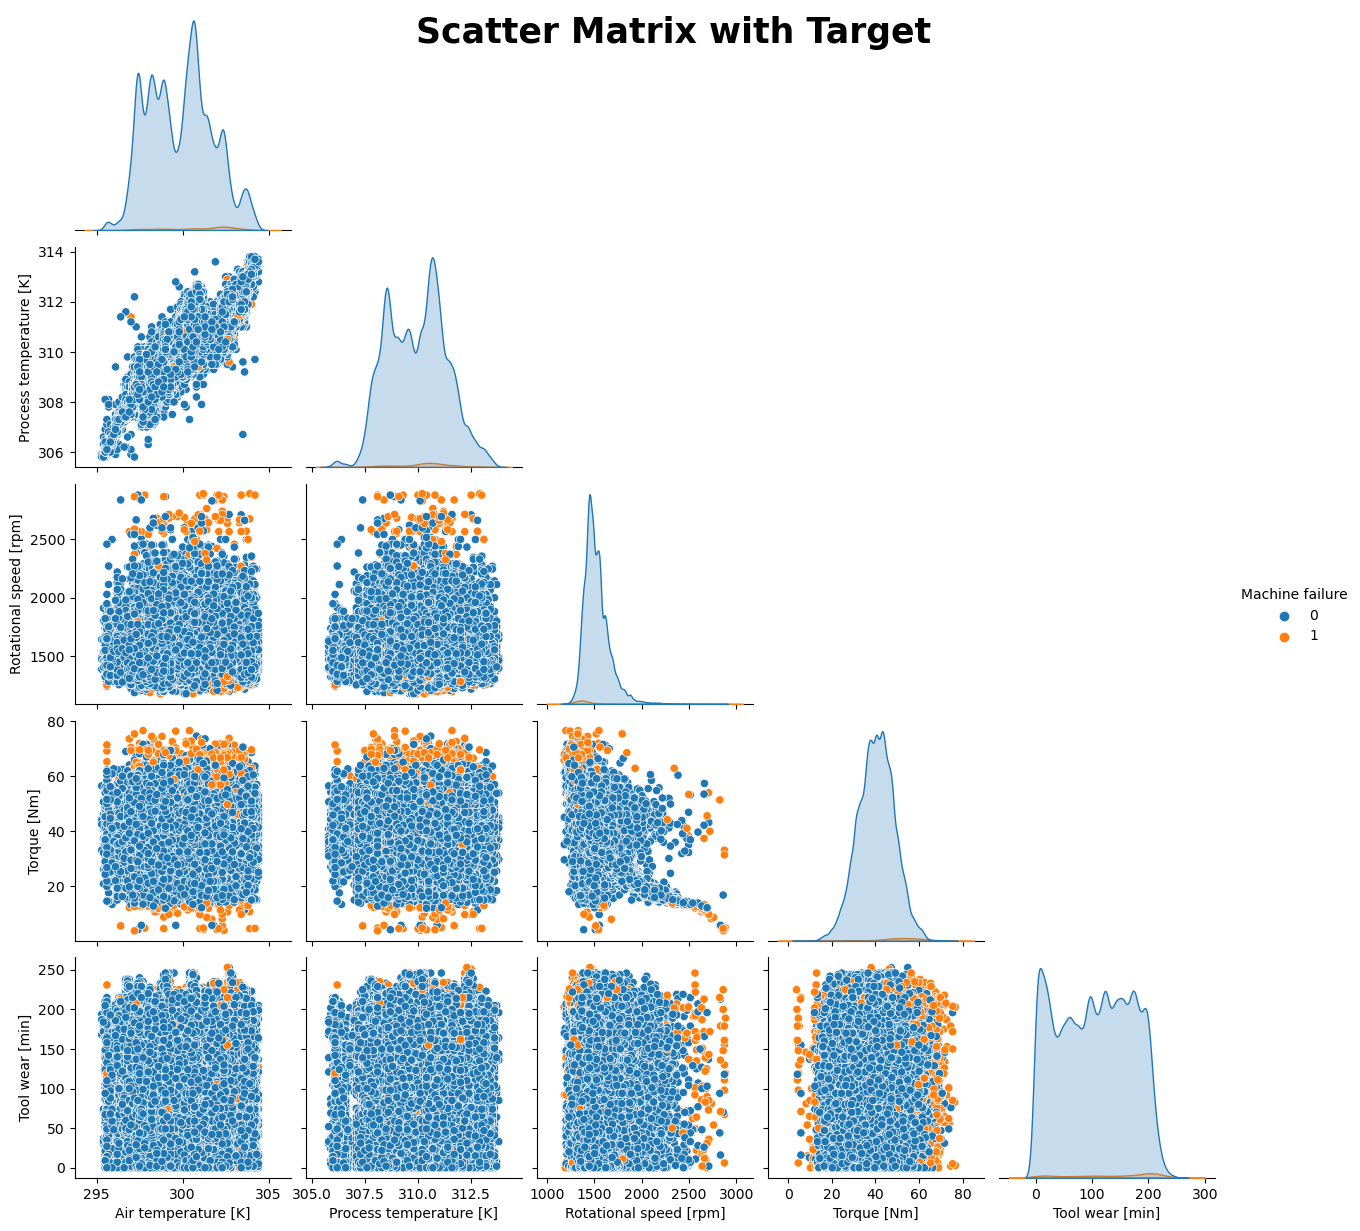

In [22]:
curves = sns.pairplot(data = df_train, x_vars=num_cols, y_vars=num_cols, hue=target_col, corner=True)
curves._legend.set_title(target_col)
plt.suptitle(f'Scatter Matrix with Target\n\n', ha='center', fontweight='bold', fontsize=25, y=0.98)
plt.show()

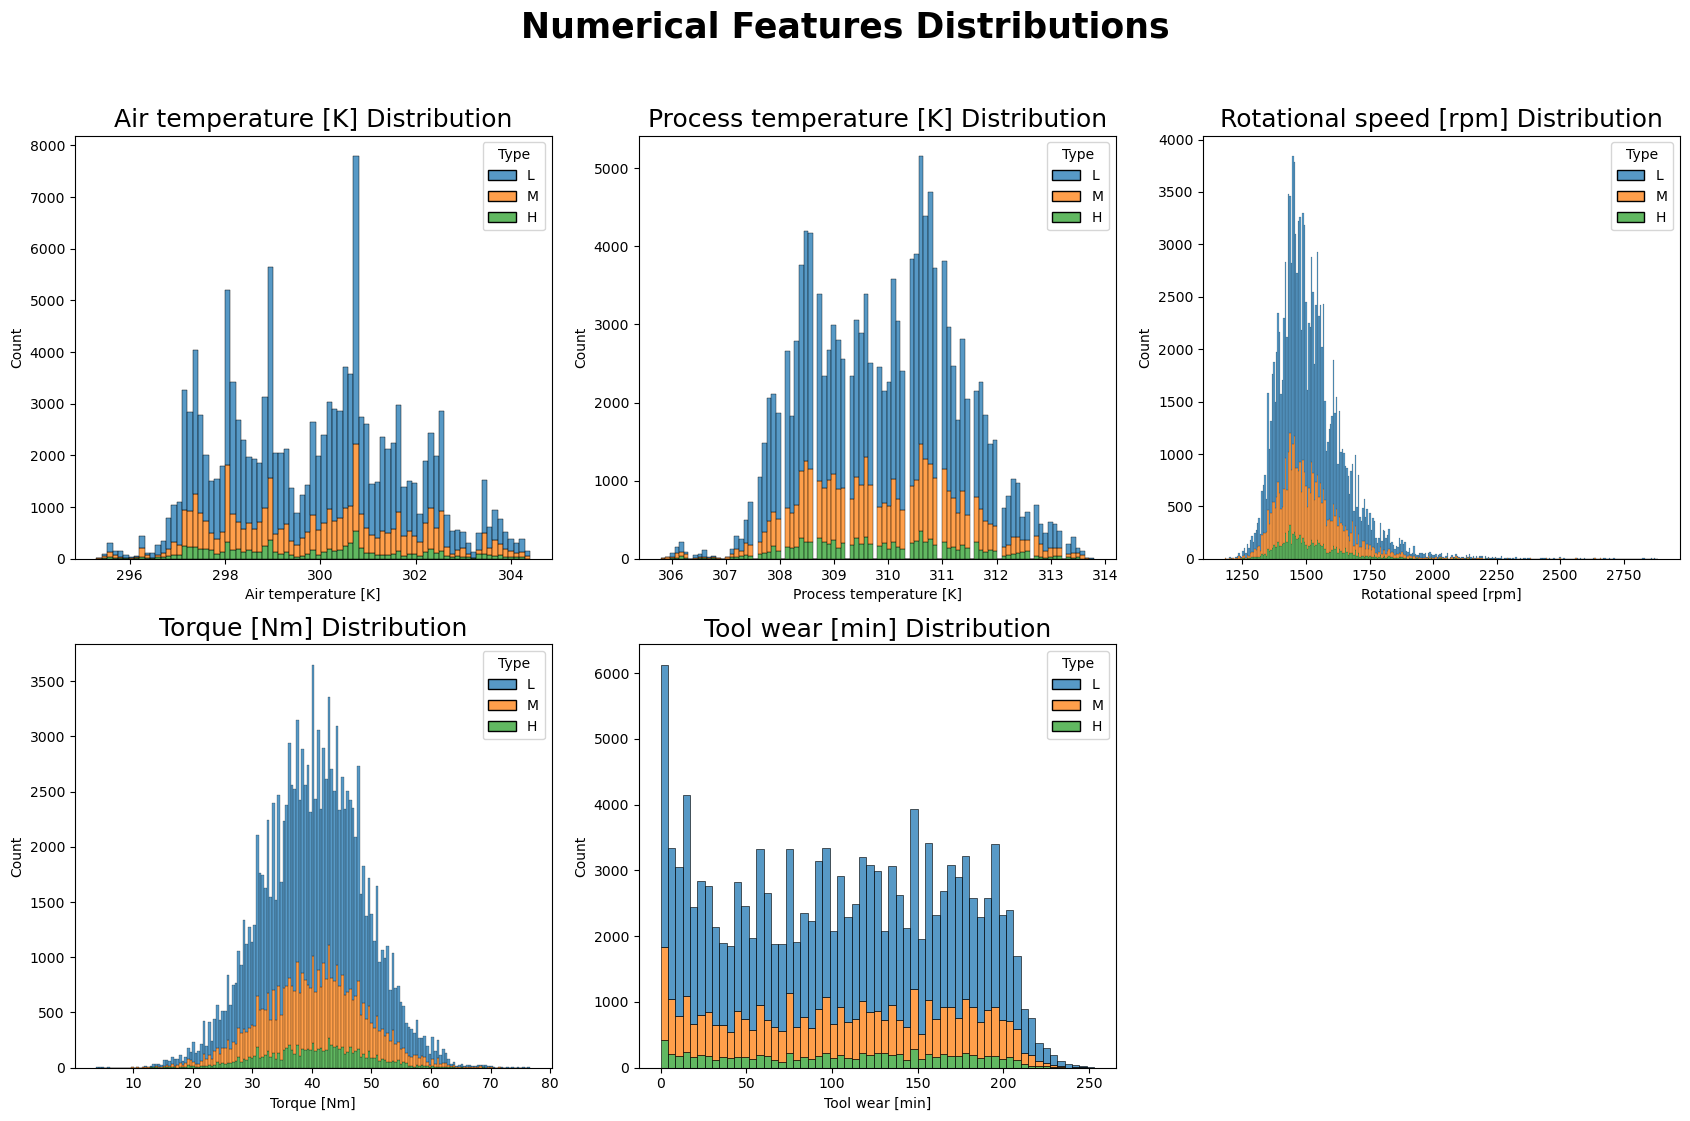

In [23]:
fig, ax = plt.subplots(2,3,figsize=(17, 12))
ax = ax.flatten()
for i, column in enumerate(num_cols):
    plot_axes=[ax[i]]
    sns.histplot(data=df_train, x=column, hue=cat_cols, ax=ax[i], multiple='stack')
    ax[i].set_title(f'{column} Distribution', fontsize=18)
for i in range(len(num_cols), len(ax)):
    ax[i].axis('off')
fig.suptitle(f'Numerical Features Distributions\n\n\n', ha='center', fontweight='bold', fontsize=25, y=0.93)
plt.tight_layout()
plt.show()

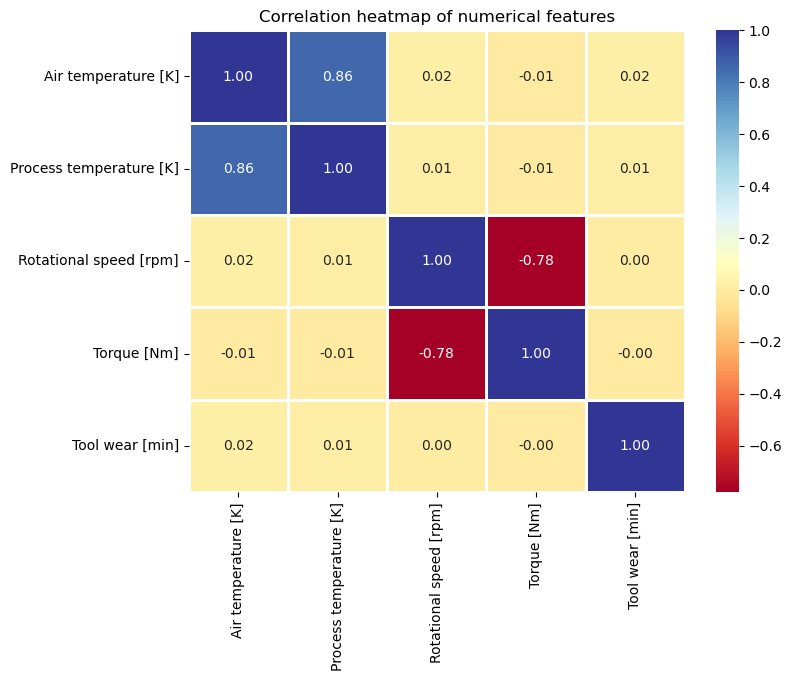

In [24]:
corr_mat = df_train[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, cmap='RdYlBu', fmt='.2f', annot_kws=None, linewidths=1)
plt.title("Correlation heatmap of numerical features")
plt.show()

In [25]:
X = train_data.copy()
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int

In [26]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [27]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

HDF                        0.021936
Torque [Nm]                0.019790
Rotational speed [rpm]     0.019578
OSF                        0.016777
Product ID                 0.013813
PWF                        0.009875
Tool wear [min]            0.007121
TWF                        0.006690
Air temperature [K]        0.005488
Type                       0.003273
Process temperature [K]    0.002420
RNF                        0.000000
Name: MI Scores, dtype: float64

In [28]:
X

Product ID  Type  Air temperature [K]  Process temperature [K]  \
id                                                                       
0                0     0                300.6                    309.6   
1                1     1                302.6                    312.1   
2                2     0                299.3                    308.5   
3                3     0                301.0                    310.9   
4                4     1                298.0                    309.0   
...            ...   ...                  ...                      ...   
136424         606     1                300.1                    311.4   
136425        9102     2                297.5                    308.5   
136426        4658     0                300.5                    311.8   
136427         911     0                301.7                    310.9   
136428        6146     0                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
id                                                                            
0                         1596         36.1              140    0    0    0   
1                         1759         29.1              200    0    0    0   
2                         1805         26.5               25    0    0    0   
3                         1524         44.3              197    0    0    0   
4                         1641         35.4               34    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
136424                    1530         37.5              210    0    0    0   
136425                    1447         49.1                2    0    0    0   
136426                    1524         38.5              214    0    0    0   
136427                    1447         46.3               42    0    0    0   
136428                    1557         39.3              229    0    0    0   

        OSF  RNF  
id                
0         0    0  
1         0    0  
2         0    0  
3         0    0  
4         0    0  
...     ...  ...  
136424    0    0  
136425    0    0  
136426    0    0  
136427    0    0  
136428    0    0  

[136429 rows x 12 columns]

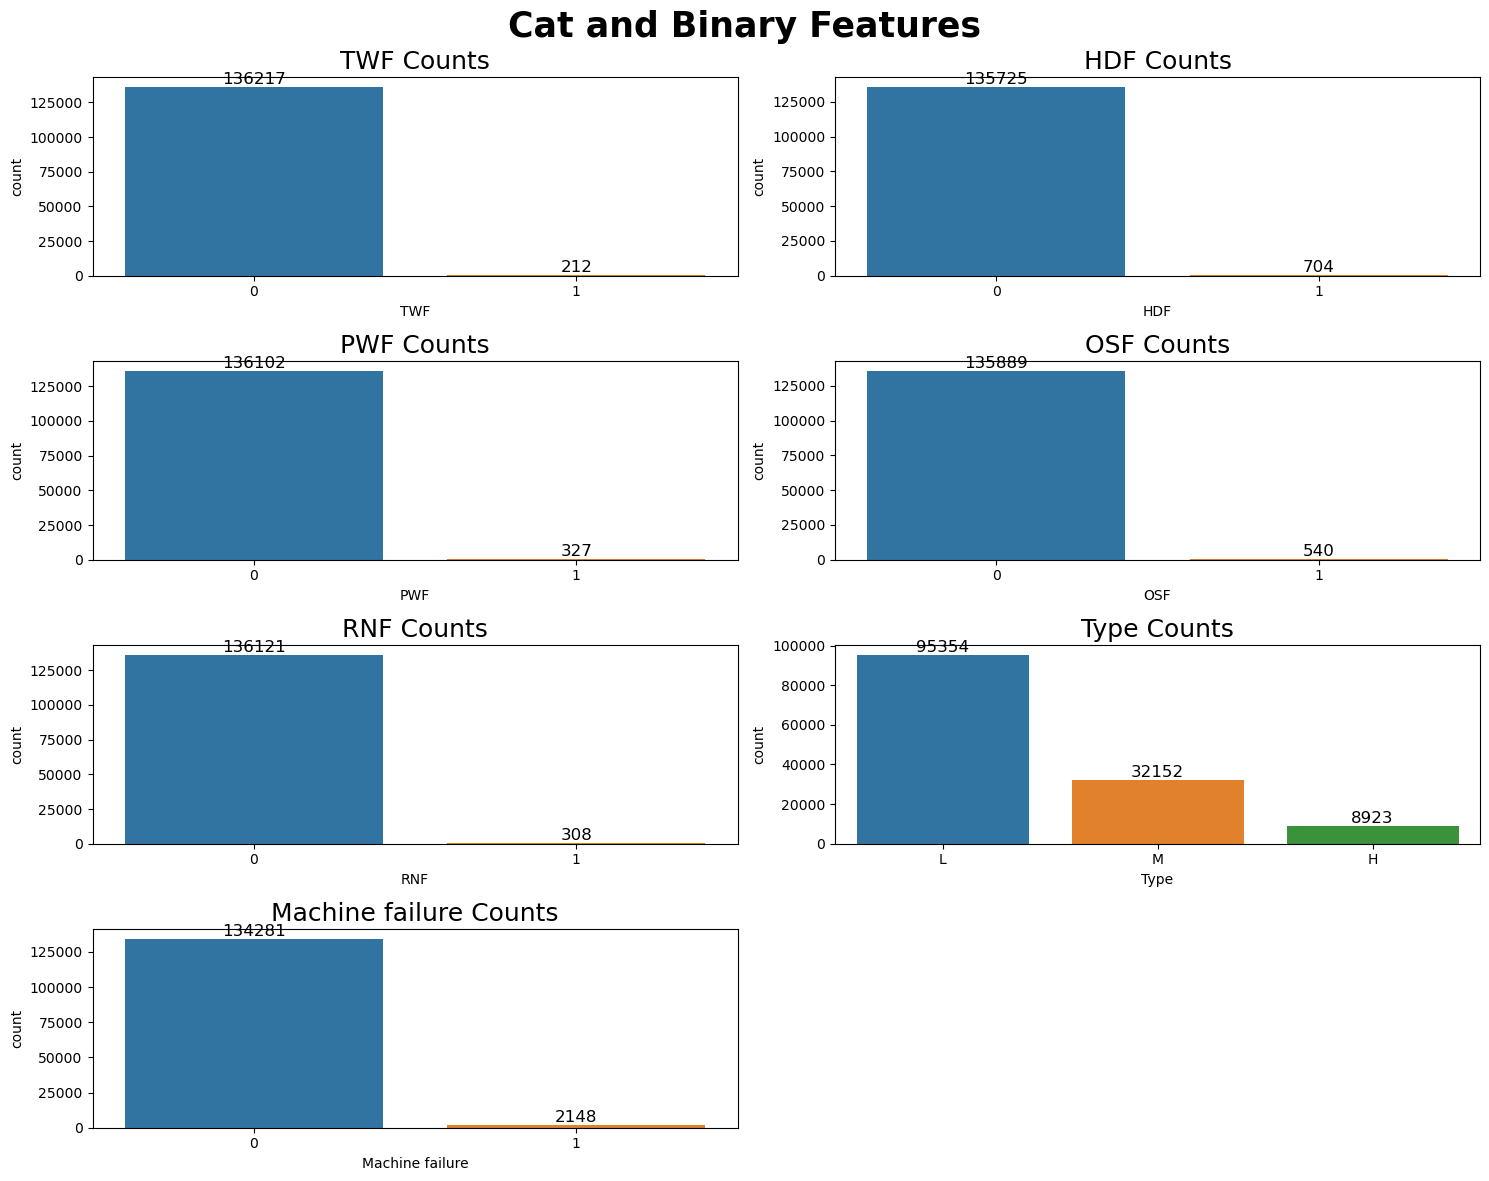

In [29]:
columns = bi_cols + [cat_cols, target_col]
fig, ax = plt.subplots(4,2,figsize=(15, 12))
ax = ax.flatten()
for i, column in enumerate(columns):
    plot_axes=[ax[i]]
    sns.countplot(data=df_train, x=column, ax=ax[i])
    ax[i].set_title(f'{column} Counts', fontsize=18)
    for p in ax[i].patches:
        value = int(p.get_height())
        ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=12)
for i in range(len(columns), len(ax)):
    ax[i].axis('off')
fig.suptitle(f'Cat and Binary Features', fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

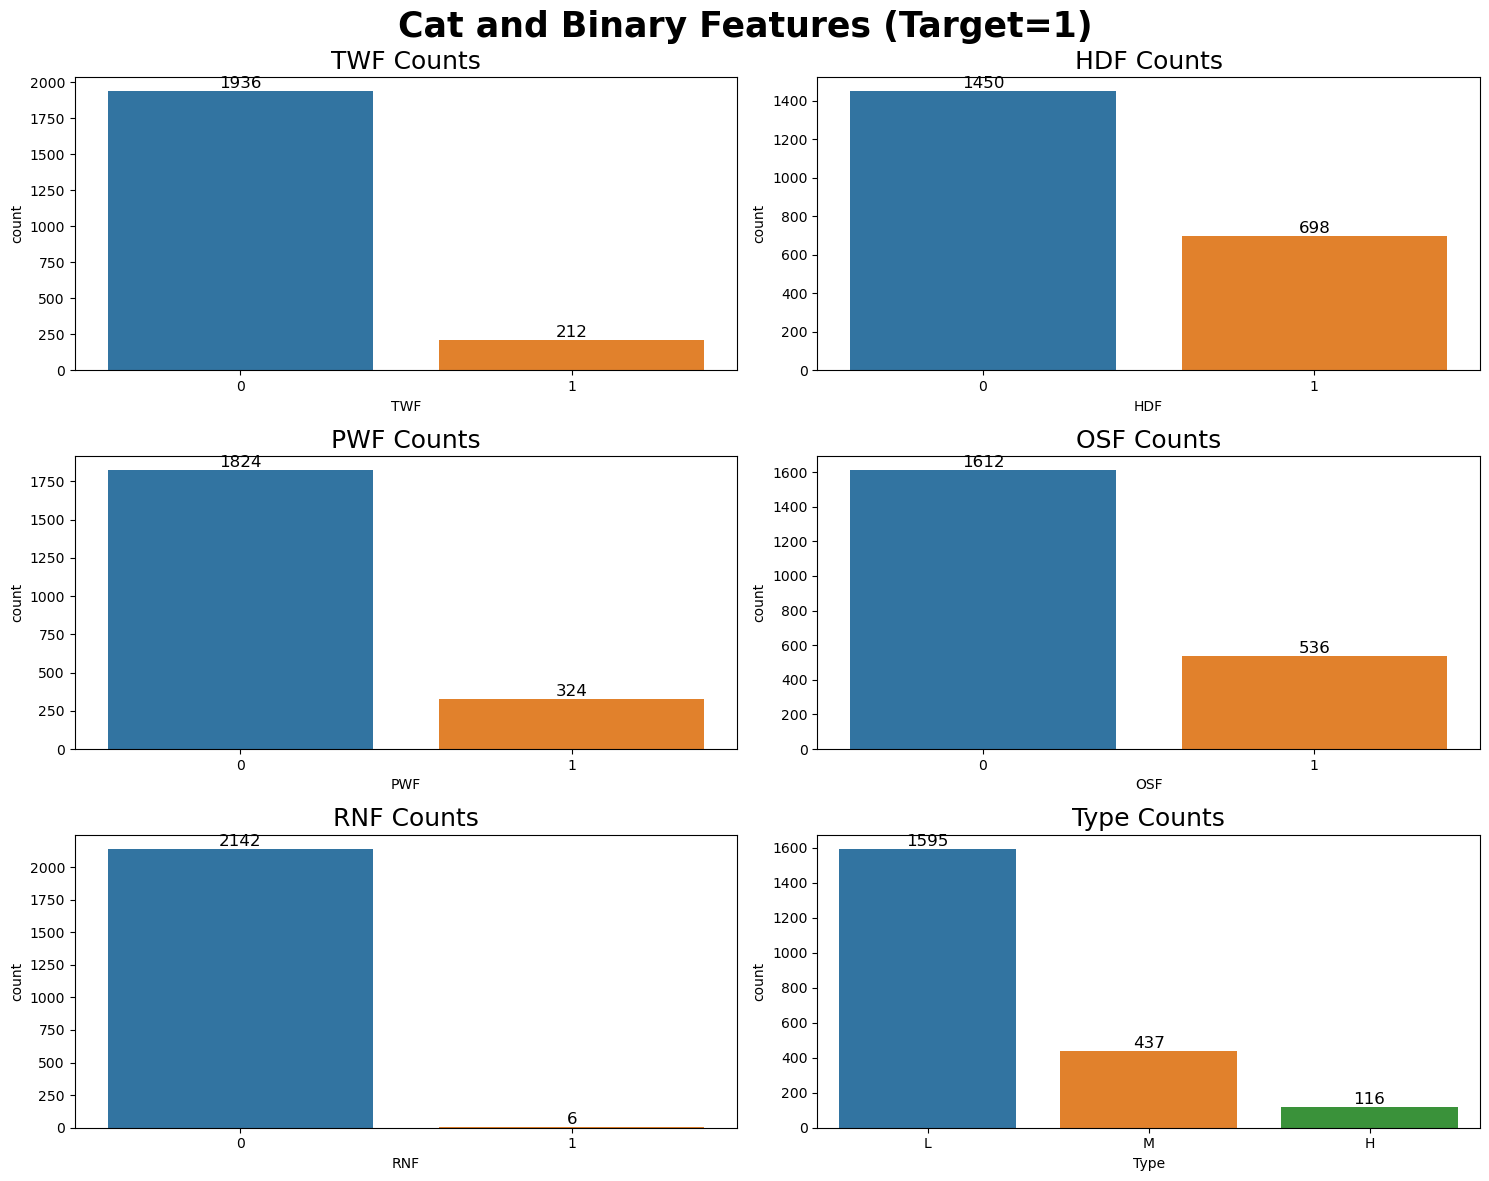

In [30]:
columns = bi_cols + [cat_cols]
df_filtered = df_train[df_train[target_col]==1]
fig, ax = plt.subplots(3,2,figsize=(15, 12))
ax = ax.flatten()
for i, column in enumerate(columns):
    plot_axes=[ax[i]]
    sns.countplot(data=df_filtered, x=column, ax=ax[i])
    ax[i].set_title(f'{column} Counts', fontsize=18)
    for p in ax[i].patches:
        value = int(p.get_height())
        ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=12)
for i in range(len(columns), len(ax)):
    ax[i].axis('off')
fig.suptitle(f'Cat and Binary Features (Target=1)', fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

In [31]:
df_train.drop(columns='RNF', axis=1)

Product ID Type  Air temperature [K]  Process temperature [K]  \
id                                                                     
0          L50096    L                300.6                    309.6   
1          M20343    M                302.6                    312.1   
2          L49454    L                299.3                    308.5   
3          L53355    L                301.0                    310.9   
4          M24050    M                298.0                    309.0   
...           ...  ...                  ...                      ...   
136424     M22284    M                300.1                    311.4   
136425     H38017    H                297.5                    308.5   
136426     L54690    L                300.5                    311.8   
136427     L53876    L                301.7                    310.9   
136428     L47937    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
id                                                                              
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  
id                          
0         0    0    0    0  
1         0    0    0    0  
2         0    0    0    0  
3         0    0    0    0  
4         0    0    0    0  
...     ...  ...  ...  ...  
136424    0    0    0    0  
136425    0    0    0    0  
136426    0    0    0    0  
136427    0    0    0    0  
136428    0    0    0    0  

[136429 rows x 12 columns]

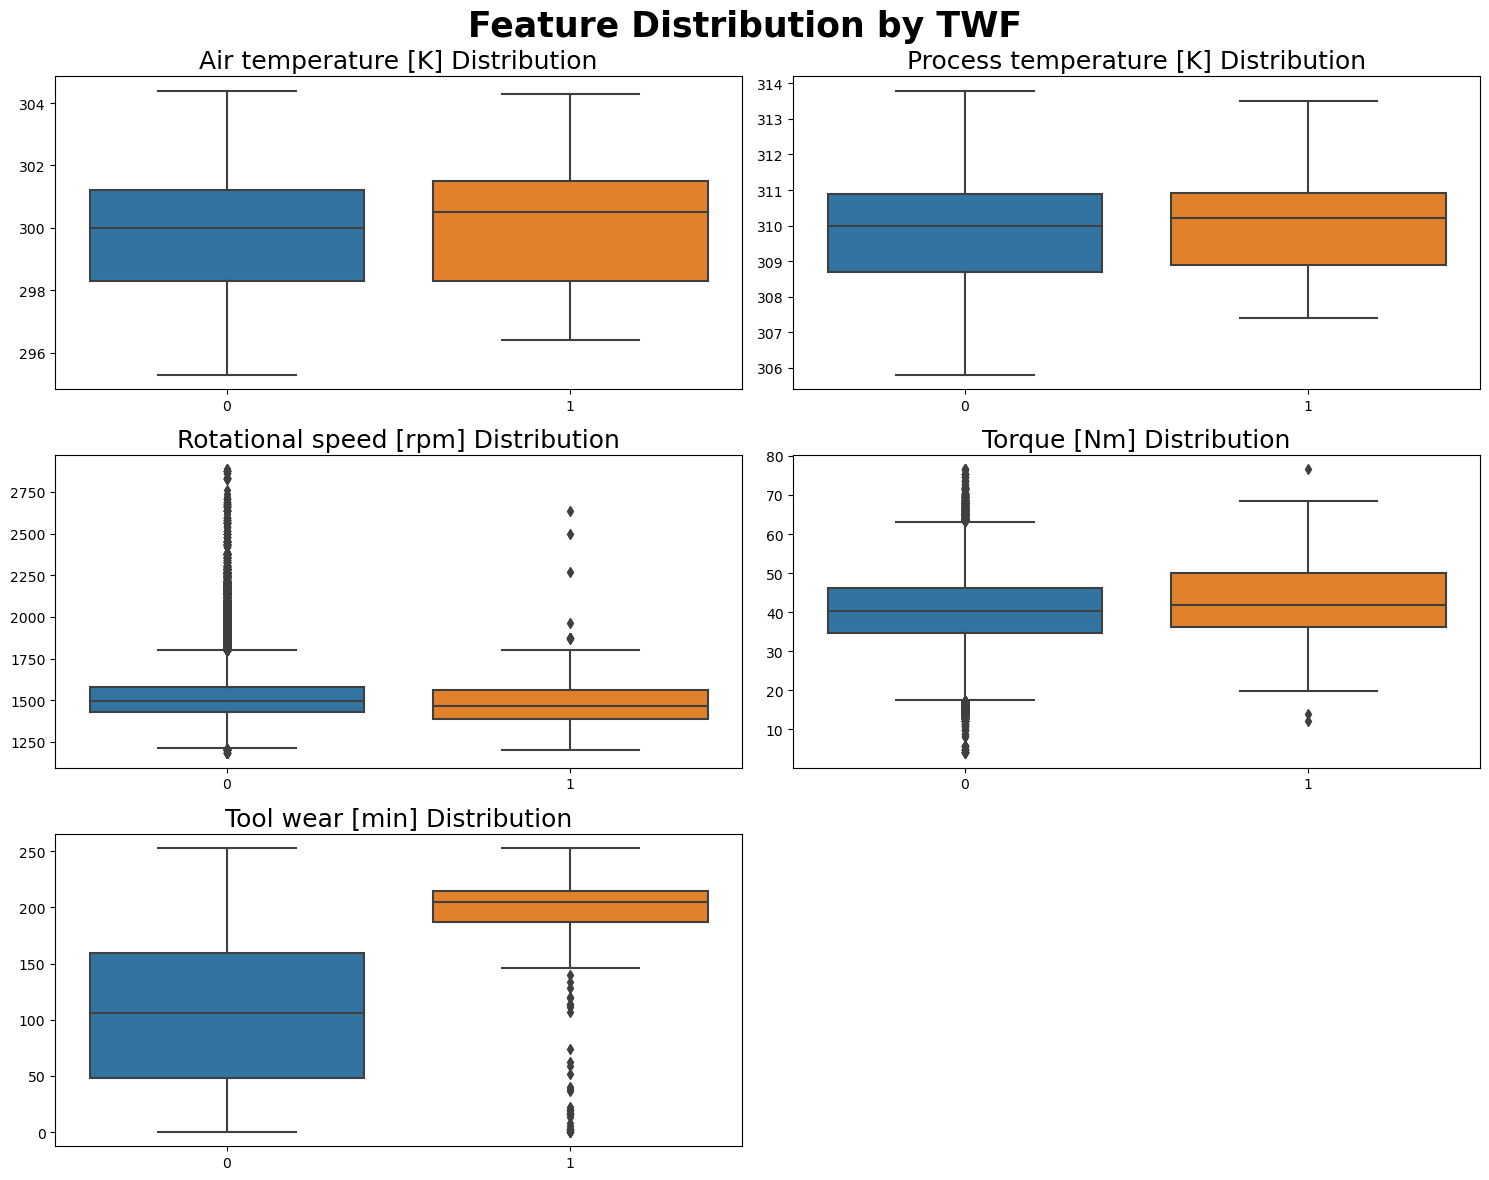

In [32]:
n_rows = len(num_cols)// 2
if n_rows % 2 != 0:
    n_rows += 1
fig, ax = plt.subplots(3,2,figsize=(15, 12))
ax = ax.flatten()
unique_target = df_train['TWF'].unique()
for i, column in enumerate(num_cols):
    data = [df_train[df_train['TWF'] == target][column] for target in unique_target]
    sns.boxplot(data=data, ax=ax[i])
    ax[i].set_title(f'{column} Distribution', fontsize=18)
for i in range(len(num_cols), len(ax)):
    ax[i].axis('off')
fig.suptitle(f'Feature Distribution by TWF', fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

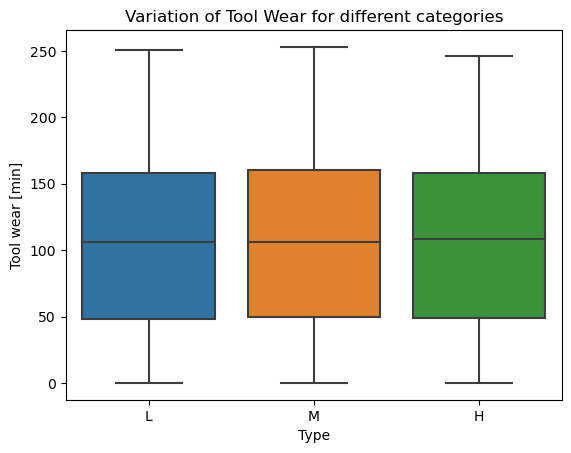

In [33]:
TWF_cols = df_train[['Type', 'Tool wear [min]', 'TWF']]
sns.boxplot(data=TWF_cols, x = 'Type', y = 'Tool wear [min]')
plt.title('Variation of Tool Wear for different categories')
plt.show()

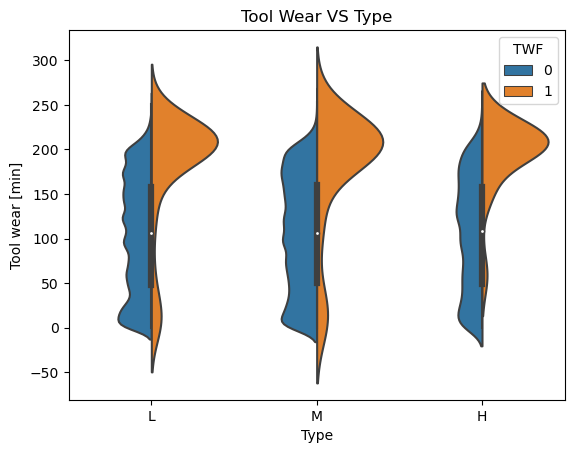

In [34]:
sns.violinplot(data=TWF_cols, x = 'Type', y = 'Tool wear [min]', hue = 'TWF', split=True)
plt.title('Tool Wear VS Type')
plt.show()

In [35]:
# one-way ANOVA test
result_anova = stats.f_oneway(*(TWF_cols[TWF_cols['Type'] == t]['Tool wear [min]'] for t in TWF_cols['Type'].unique()))

print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)
print()

alpha = 0.05  # Significance level

if result_anova.pvalue < alpha:
    print("There is evidence of a significant difference in the means of 'Tool wear [min]' across different values of 'Type'.")
else:
    print("There is no significant difference in the means of 'Tool wear [min]' across different values of 'Type'.")
print()

ANOVA Test Results:
F-statistic: 3.3949164578041544
p-value: 0.03354619015995314

There is evidence of a significant difference in the means of 'Tool wear [min]' across different values of 'Type'.



In [36]:
# Levene's test
result_levene = stats.levene(*(TWF_cols[TWF_cols['Type'] == t]['Tool wear [min]'] for t in TWF_cols['Type'].unique()))

print("Levene's Test Results:")
print("Test statistic:", result_levene.statistic)
print("p-value:", result_levene.pvalue)
print()

alpha = 0.05  # Significance level

if result_levene.pvalue < alpha:
    print("There is evidence of a significant difference in the variances of 'Tool wear [min]' across different values of 'Type'.")
else:
    print("There is no significant difference in the variances of 'Tool wear [min]' across different values of 'Type'.")

Levene's Test Results:
Test statistic: 8.15951222197882
p-value: 0.00028614146175158137

There is evidence of a significant difference in the variances of 'Tool wear [min]' across different values of 'Type'.


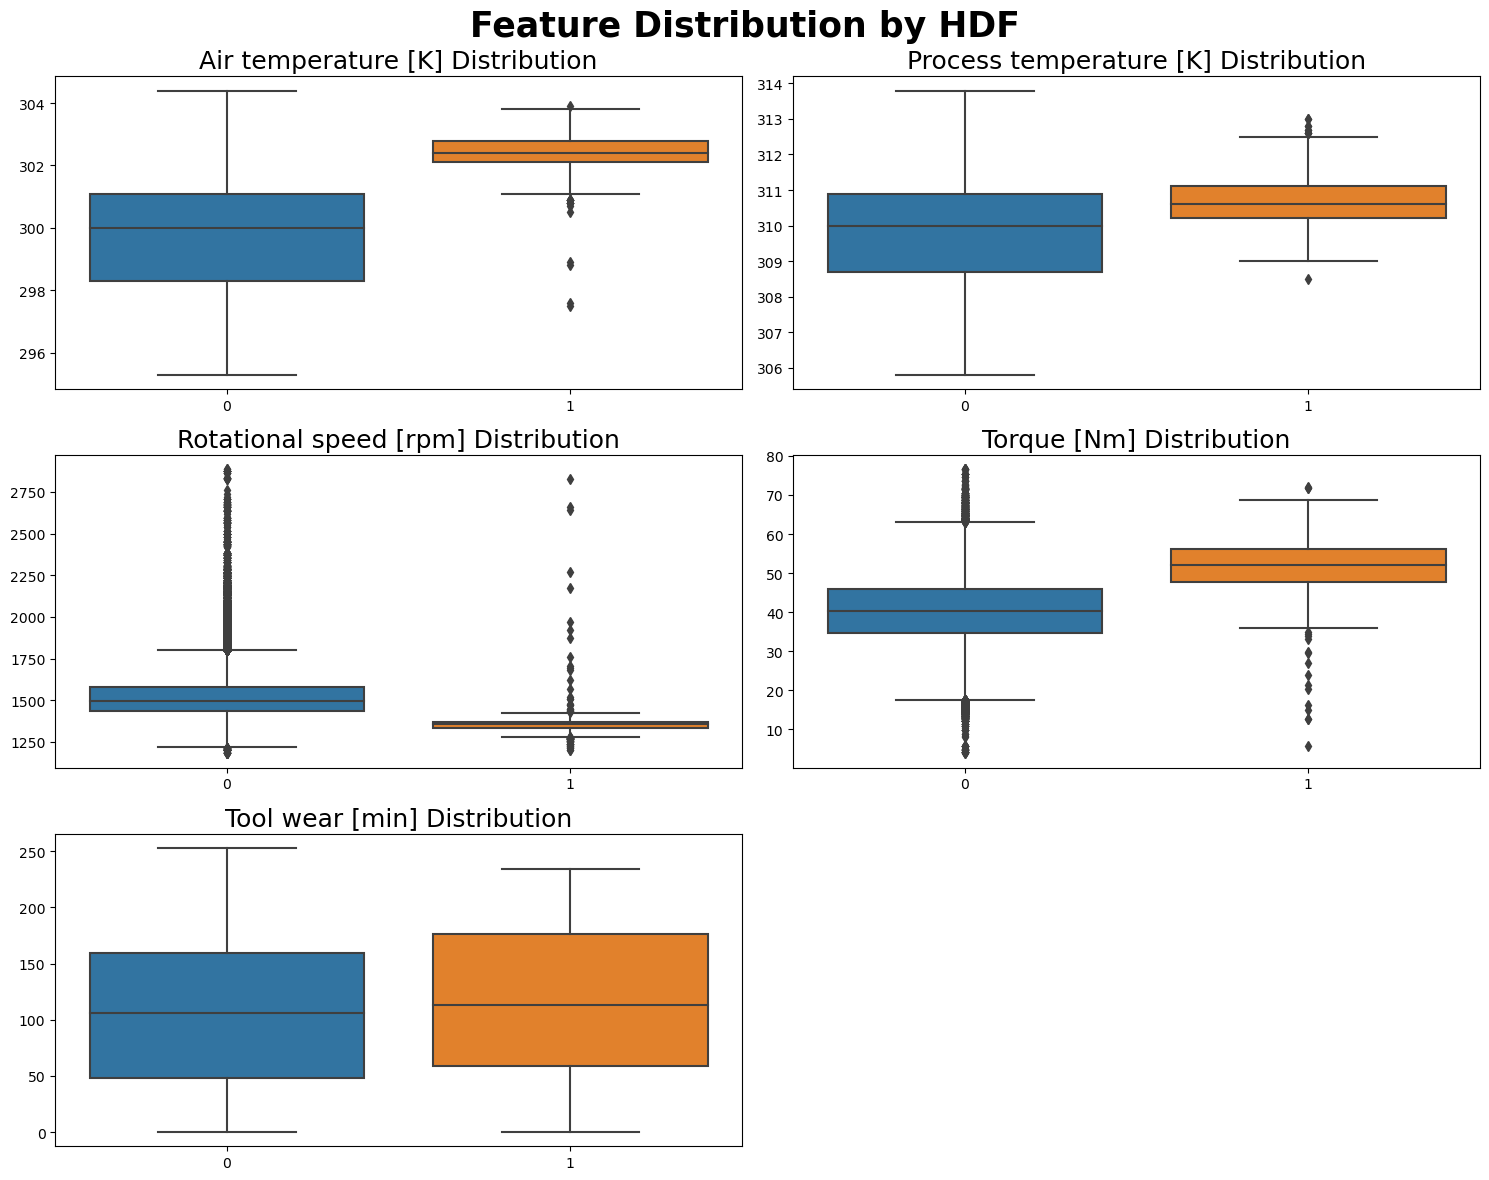

In [37]:
n_rows = len(num_cols)// 2
if n_rows % 2 != 0:
    n_rows += 1
fig, ax = plt.subplots(3,2,figsize=(15, 12))
ax = ax.flatten()
unique_target = df_train['HDF'].unique()
for i, column in enumerate(num_cols):
    data = [df_train[df_train['HDF'] == target][column] for target in unique_target]
    sns.boxplot(data=data, ax=ax[i])
    ax[i].set_title(f'{column} Distribution', fontsize=18)
for i in range(len(num_cols), len(ax)):
    ax[i].axis('off')
fig.suptitle(f'Feature Distribution by HDF', fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

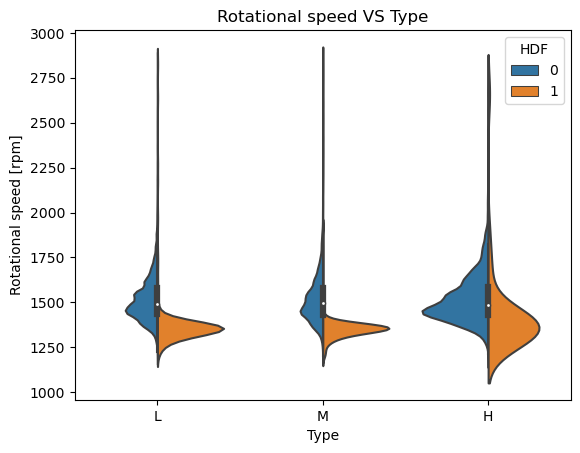

In [38]:
HDF_cols = df_train[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'HDF']]
sns.violinplot(data=HDF_cols, x = 'Type', y = 'Rotational speed [rpm]', hue = 'HDF', split=True)
plt.title('Rotational speed VS Type')
plt.show()

In [39]:
# one-way ANOVA test
result_anova = stats.f_oneway(*(HDF_cols[HDF_cols['Type'] == t]['Rotational speed [rpm]'] for t in TWF_cols['Type'].unique()))

print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)
print()

alpha = 0.05  # Significance level

if result_anova.pvalue < alpha:
    print("There is evidence of a significant difference in the means of 'Rotational speed [rpm]' across different values of 'Type'.")
else:
    print("There is no significant difference in the means of 'Rotational speed [rpm]' across different values of 'Type'.")
print()

ANOVA Test Results:
F-statistic: 0.5726432601386056
p-value: 0.5640339374004131

There is no significant difference in the means of 'Rotational speed [rpm]' across different values of 'Type'.



In [40]:
# Levene's test
result_levene = stats.levene(*(HDF_cols[HDF_cols['Type'] == t]['Rotational speed [rpm]'] for t in HDF_cols['Type'].unique()))

print("Levene's Test Results:")
print("Test statistic:", result_levene.statistic)
print("p-value:", result_levene.pvalue)
print()

alpha = 0.05  # Significance level

if result_levene.pvalue < alpha:
    print("There is evidence of a significant difference in the variances of 'Rotational speed [rpm]' across different values of 'Type'.")
else:
    print("There is no significant difference in the variances of 'Rotational speed [rpm]' across different values of 'Type'.")

Levene's Test Results:
Test statistic: 17.978682152874903
p-value: 1.55950344615656e-08

There is evidence of a significant difference in the variances of 'Rotational speed [rpm]' across different values of 'Type'.


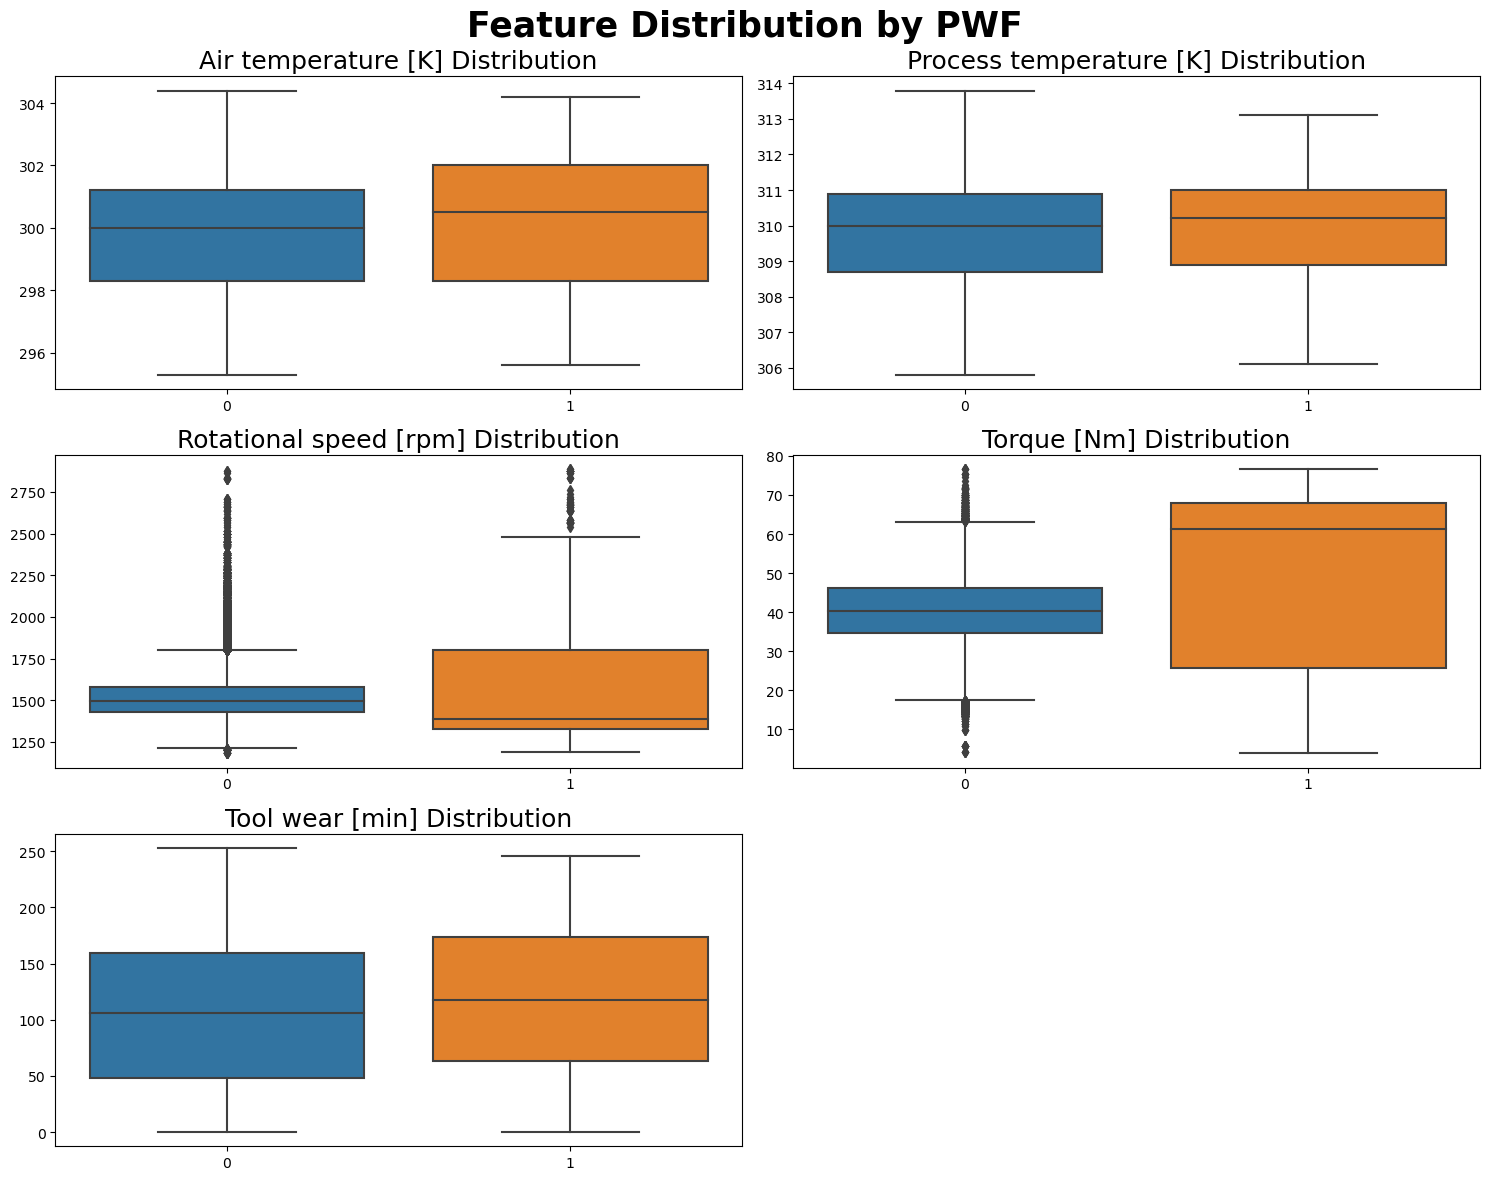

In [41]:
n_rows = len(num_cols)// 2
if n_rows % 2 != 0:
    n_rows += 1
fig, ax = plt.subplots(3,2,figsize=(15, 12))
ax = ax.flatten()
unique_target = df_train['PWF'].unique()
for i, column in enumerate(num_cols):
    data = [df_train[df_train['PWF'] == target][column] for target in unique_target]
    sns.boxplot(data=data, ax=ax[i])
    ax[i].set_title(f'{column} Distribution', fontsize=18)
for i in range(len(num_cols), len(ax)):
    ax[i].axis('off')
fig.suptitle(f'Feature Distribution by PWF', fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

In [42]:
df_train['Power'] = df_train['Rotational speed [rpm]'] * (2*np.pi/60) * df_train['Torque [Nm]']

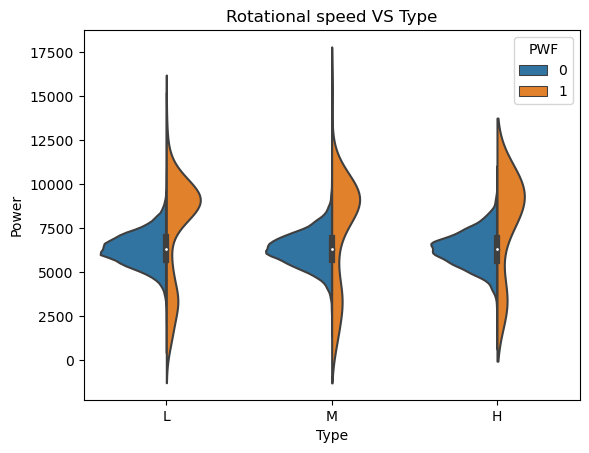

In [43]:
PWF_cols = df_train[['Type', 'Torque [Nm]', 'Power', 'Rotational speed [rpm]', 'PWF']]
sns.violinplot(data=PWF_cols, x = 'Type', y = 'Power', hue = 'PWF', split=True)
plt.title('Rotational speed VS Type')
plt.show()

In [44]:
# one-way ANOVA test
result_anova = stats.f_oneway(*(PWF_cols[PWF_cols['Type'] == t]['Power'] for t in PWF_cols['Type'].unique()))

print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)
print()

alpha = 0.05  # Significance level

if result_anova.pvalue < alpha:
    print("There is evidence of a significant difference in the means of 'Power' across different values of 'Type'.")
else:
    print("There is no significant difference in the means of 'Power' across different values of 'Type'.")
print()

ANOVA Test Results:
F-statistic: 1.043157239250387
p-value: 0.35234331116899764

There is no significant difference in the means of 'Power' across different values of 'Type'.



In [45]:
# Levene's test
result_levene = stats.levene(*(PWF_cols[PWF_cols['Type'] == t]['Power'] for t in PWF_cols['Type'].unique()))

print("Levene's Test Results:")
print("Test statistic:", result_levene.statistic)
print("p-value:", result_levene.pvalue)
print()

alpha = 0.05  # Significance level

if result_levene.pvalue < alpha:
    print("There is evidence of a significant difference in the variances of 'Power' across different values of 'Type'.")
else:
    print("There is no significant difference in the variances of 'Power' across different values of 'Type'.")

Levene's Test Results:
Test statistic: 5.644218973279353
p-value: 0.0035387367234561654

There is evidence of a significant difference in the variances of 'Power' across different values of 'Type'.


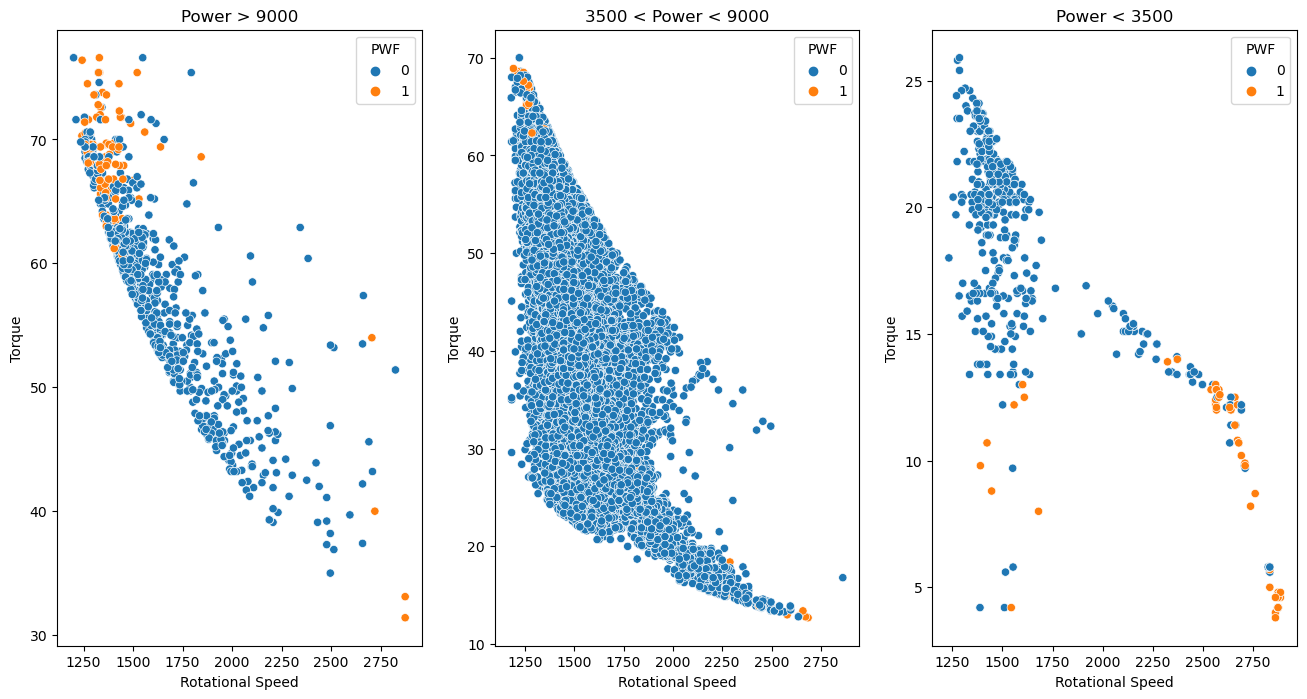

In [46]:
fig = plt.figure(figsize=(16,8))
plt.subplot(1, 3, 1)
sns.scatterplot(data=PWF_cols[PWF_cols['Power'] > 9000], x='Rotational speed [rpm]', y='Torque [Nm]', hue='PWF')
plt.title('Power > 9000')
plt.xlabel('Rotational Speed')
plt.ylabel('Torque')
plt.subplot(1, 3, 2)
sns.scatterplot(data=PWF_cols[(PWF_cols['Power'] < 9000) & (PWF_cols['Power'] > 3500)], x='Rotational speed [rpm]',
                y='Torque [Nm]', hue='PWF')
plt.title('3500 < Power < 9000')
plt.xlabel('Rotational Speed')
plt.ylabel('Torque')
plt.subplot(1, 3, 3)
sns.scatterplot(data=PWF_cols[PWF_cols['Power'] < 3500], x='Rotational speed [rpm]',
                y='Torque [Nm]', hue='PWF')
plt.title('Power < 3500')
plt.xlabel('Rotational Speed')
plt.ylabel('Torque')
plt.show()

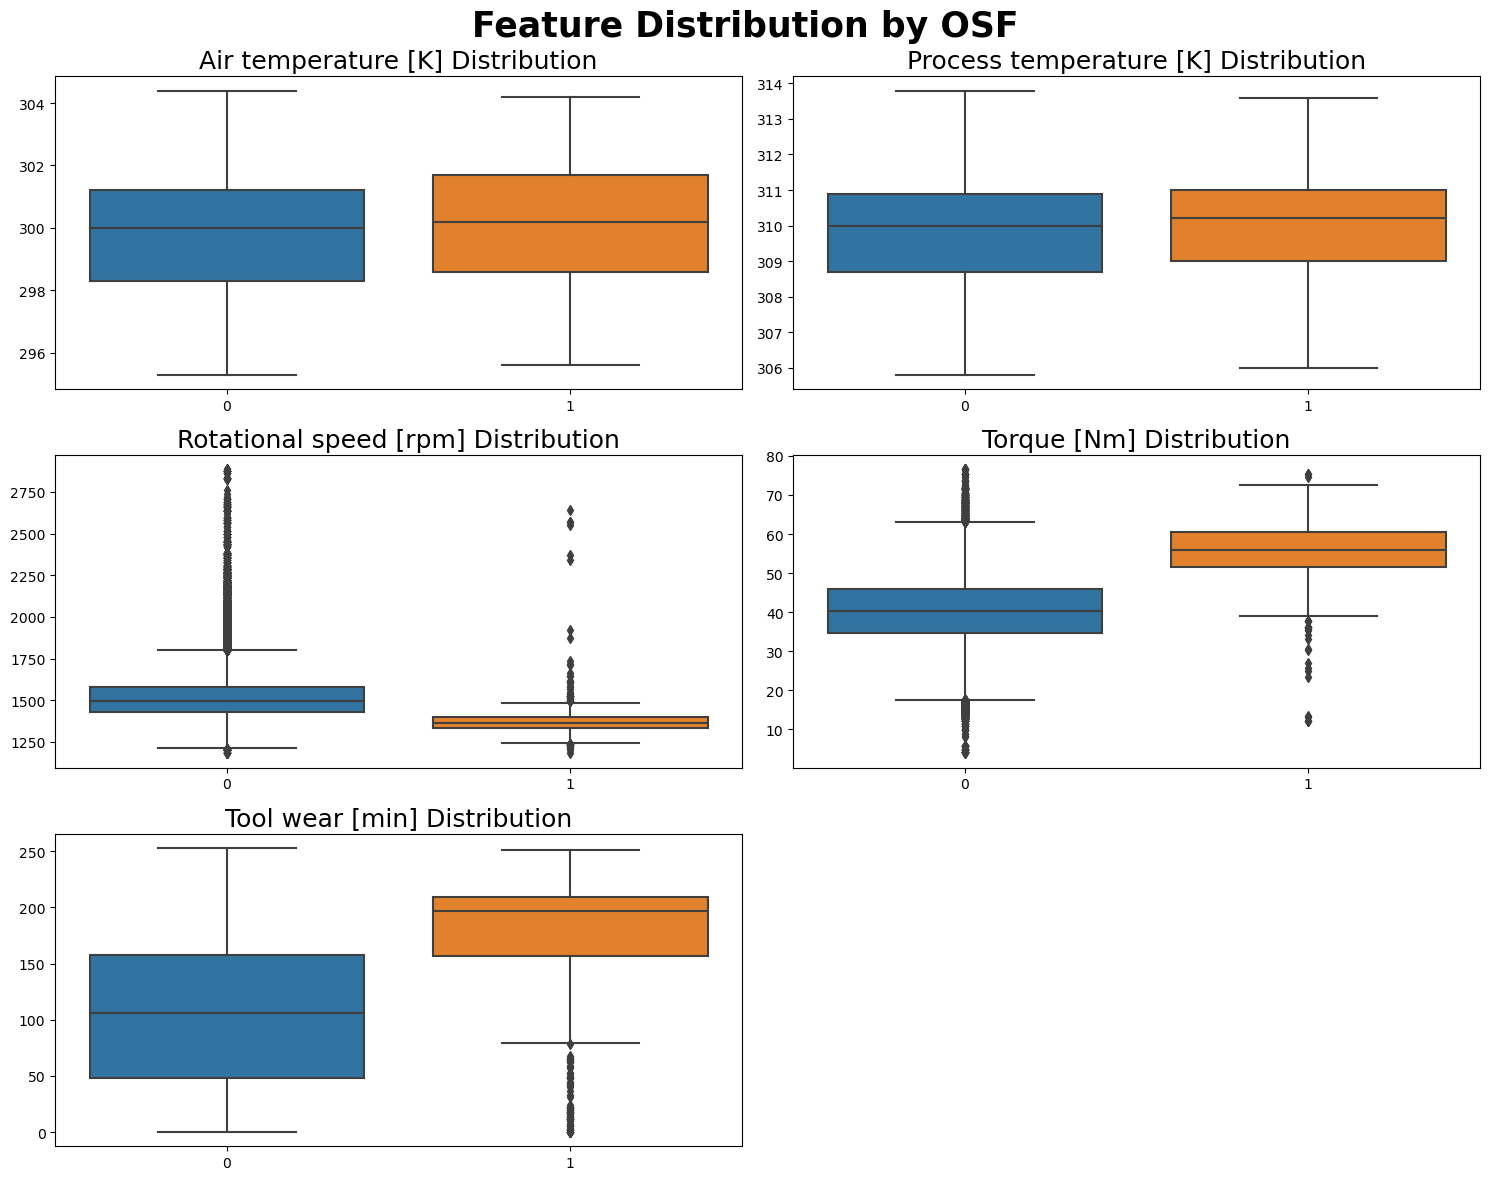

In [47]:
n_rows = len(num_cols)// 2
if n_rows % 2 != 0:
    n_rows += 1
fig, ax = plt.subplots(3,2,figsize=(15, 12))
ax = ax.flatten()
unique_target = df_train['OSF'].unique()
for i, column in enumerate(num_cols):
    data = [df_train[df_train['OSF'] == target][column] for target in unique_target]
    sns.boxplot(data=data, ax=ax[i])
    ax[i].set_title(f'{column} Distribution', fontsize=18)
for i in range(len(num_cols), len(ax)):
    ax[i].axis('off')
fig.suptitle(f'Feature Distribution by OSF', fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

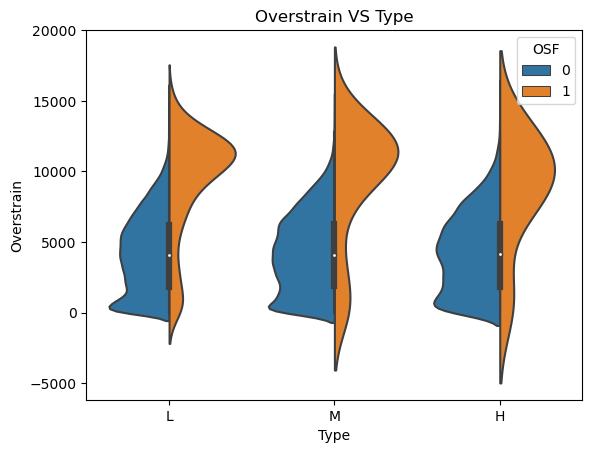

In [48]:
df_train['Overstrain'] = df_train['Torque [Nm]'] * df_train['Tool wear [min]']
OSF_cols = df_train[['Type', 'Torque [Nm]', 'Tool wear [min]', 'Overstrain', 'OSF', 'Rotational speed [rpm]']]
sns.violinplot(data=OSF_cols, x = 'Type', y = 'Overstrain', hue = 'OSF', split=True)
plt.title('Overstrain VS Type')
plt.show()

In [49]:
# one-way ANOVA test
result_anova = stats.f_oneway(*(OSF_cols[OSF_cols['Type'] == t]['Overstrain'] for t in OSF_cols['Type'].unique()))

print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)
print()

alpha = 0.05  # Significance level

if result_anova.pvalue < alpha:
    print("There is evidence of a significant difference in the means of 'Power' across different values of 'Type'.")
else:
    print("There is no significant difference in the means of 'Power' across different values of 'Type'.")
print()

ANOVA Test Results:
F-statistic: 3.3827693700564363
p-value: 0.03395614313556327

There is evidence of a significant difference in the means of 'Power' across different values of 'Type'.



In [50]:
# Levene's test
result_levene = stats.levene(*(OSF_cols[OSF_cols['Type'] == t]['Overstrain'] for t in OSF_cols['Type'].unique()))

print("Levene's Test Results:")
print("Test statistic:", result_levene.statistic)
print("p-value:", result_levene.pvalue)
print()

alpha = 0.05  # Significance level

if result_levene.pvalue < alpha:
    print("There is evidence of a significant difference in the variances of 'Power' across different values of 'Type'.")
else:
    print("There is no significant difference in the variances of 'Power' across different values of 'Type'.")

Levene's Test Results:
Test statistic: 1.8421184798184018
p-value: 0.15848527271890492

There is no significant difference in the variances of 'Power' across different values of 'Type'.


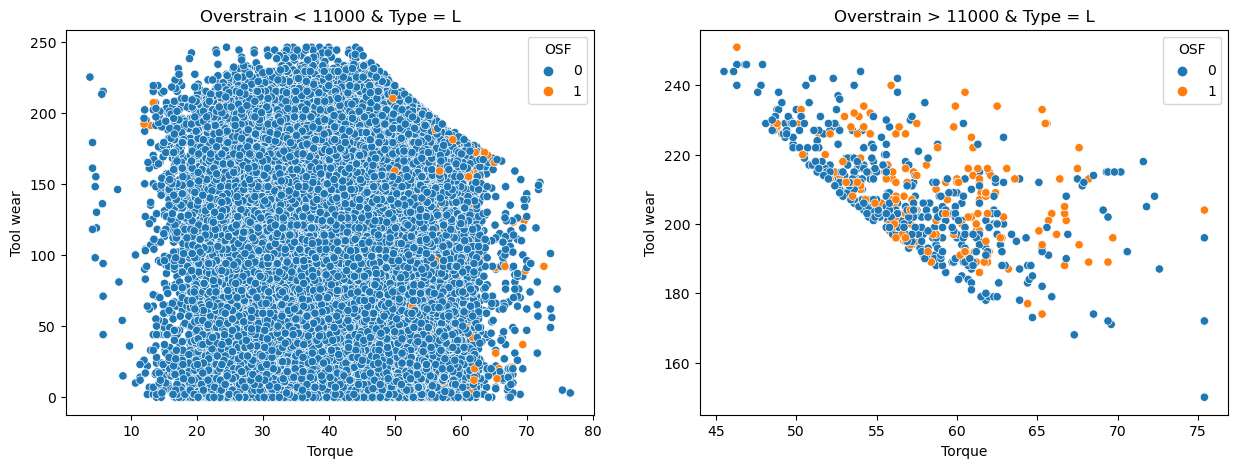

In [51]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=OSF_cols[(OSF_cols['Overstrain'] < 11000) & (OSF_cols['Type'] == 'L')], x='Torque [Nm]',
                y='Tool wear [min]', hue='OSF')
plt.title('Overstrain < 11000 & Type = L')
plt.xlabel('Torque')
plt.ylabel('Tool wear')
plt.subplot(1, 2, 2)
sns.scatterplot(data=OSF_cols[(OSF_cols['Overstrain'] > 11000) & (OSF_cols['Type'] == 'L')], x='Torque [Nm]',
                y='Tool wear [min]', hue='OSF')
plt.title('Overstrain > 11000 & Type = L')
plt.xlabel('Torque')
plt.ylabel('Tool wear')
plt.show()

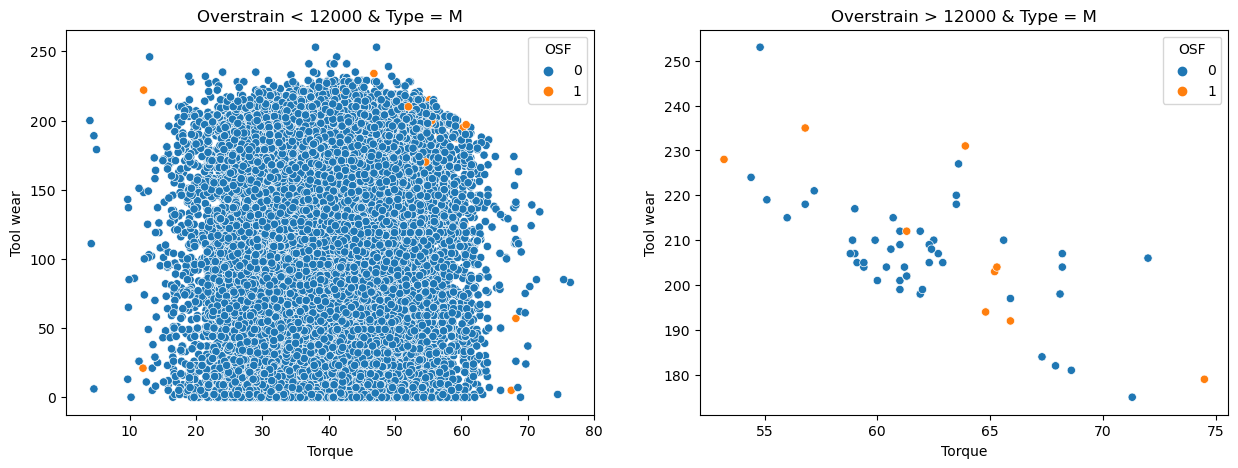

In [52]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=OSF_cols[(OSF_cols['Overstrain'] < 12000) & (OSF_cols['Type'] == 'M')], x='Torque [Nm]',
                y='Tool wear [min]', hue='OSF')
plt.title('Overstrain < 12000 & Type = M')
plt.xlabel('Torque')
plt.ylabel('Tool wear')
plt.subplot(1, 2, 2)
sns.scatterplot(data=OSF_cols[(OSF_cols['Overstrain'] > 12000) & (OSF_cols['Type'] == 'M')], x='Torque [Nm]',
                y='Tool wear [min]', hue='OSF')
plt.title('Overstrain > 12000 & Type = M')
plt.xlabel('Torque')
plt.ylabel('Tool wear')
plt.show()

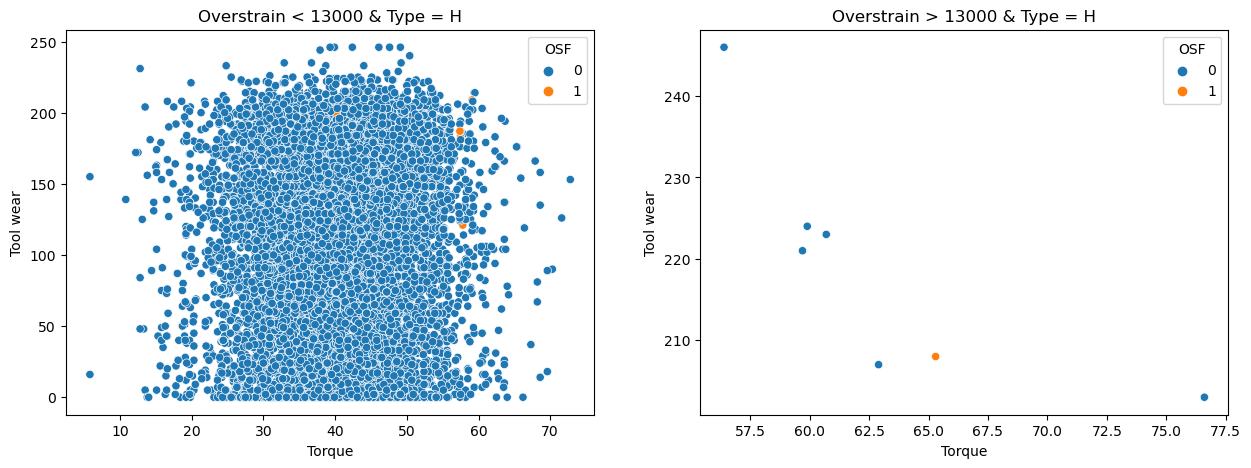

In [53]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=OSF_cols[(OSF_cols['Overstrain'] < 13000) & (OSF_cols['Type'] == 'H')], x='Torque [Nm]',
                y='Tool wear [min]', hue='OSF')
plt.title('Overstrain < 13000 & Type = H')
plt.xlabel('Torque')
plt.ylabel('Tool wear')
plt.subplot(1, 2, 2)
sns.scatterplot(data=OSF_cols[(OSF_cols['Overstrain'] > 13000) & (OSF_cols['Type'] == 'H')], x='Torque [Nm]',
                y='Tool wear [min]', hue='OSF')
plt.title('Overstrain > 13000 & Type = H')
plt.xlabel('Torque')
plt.ylabel('Tool wear')
plt.show()

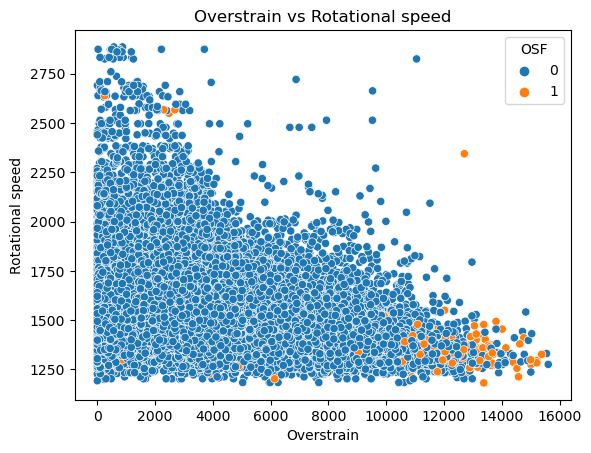

In [54]:
sns.scatterplot(data=OSF_cols, x='Overstrain',y='Rotational speed [rpm]', hue='OSF')
plt.title('Overstrain vs Rotational speed')
plt.xlabel('Overstrain')
plt.ylabel('Rotational speed')
plt.show()

In [55]:
df_train['Product Variant'] = df_train['Product ID'].astype(str).str[:3]
failure_types = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF']

group_product = df_train['Product Variant'].value_counts().reset_index()
group_product.columns = ['Product Variant', 'Count']
group_product

Product Variant  Count
0              L53  12028
1              L56  11535
2              L55  11494
3              L54  10579
4              L49   9979
5              L50   9249
6              L48   8471
7              L51   6999
8              L47   6748
9              L52   6624
10             M23   3963
11             M17   3545
12             M18   3467
13             M21   3343
14             M22   3054
15             M24   3052
16             M20   3047
17             M16   3022
18             M15   2798
19             M19   2657
20             L57   1648
21             H38   1225
22             H30    983
23             H35    886
24             H36    874
25             H37    860
26             H32    810
27             H34    779
28             H31    773
29             H33    708
30             H39    664
31             H29    361
32             M14    204

In [56]:
for fail in failure_types:
    
    # Sum the failures by product variant
    temp = df_train.groupby('Product Variant')[fail].sum().reset_index()
    group_product = pd.merge(group_product, temp, on='Product Variant')
    
    # Calculate failure ratio
    group_product[fail + '_ratio'] = (group_product[fail] / group_product['Count'])*100
group_product

Product Variant  Count  Machine failure  Machine failure_ratio  TWF  \
0              L53  12028              153               1.272032   20   
1              L56  11535              150               1.300390   22   
2              L55  11494              103               0.896120   16   
3              L54  10579              128               1.209944   22   
4              L49   9979              109               1.092294    7   
5              L50   9249               70               0.756839   12   
6              L48   8471              116               1.369378   11   
7              L51   6999              582               8.315474   15   
8              L47   6748               71               1.052164    5   
9              L52   6624              105               1.585145   11   
10             M23   3963               29               0.731769   10   
11             M17   3545               27               0.761636    8   
12             M18   3467               68               1.961350    4   
13             M21   3343               19               0.568352    4   
14             M22   3054               22               0.720367    3   
15             M24   3052               12               0.393185    4   
16             M20   3047               27               0.886117    6   
17             M16   3022               27               0.893448    6   
18             M15   2798               21               0.750536    2   
19             M19   2657              185               6.962740    7   
20             L57   1648                8               0.485437    0   
21             H38   1225                1               0.081633    0   
22             H30    983               16               1.627670    3   
23             H35    886               12               1.354402    7   
24             H36    874                1               0.114416    0   
25             H37    860                6               0.697674    1   
26             H32    810                7               0.864198    0   
27             H34    779               20               2.567394    2   
28             H31    773                4               0.517464    0   
29             H33    708               46               6.497175    4   
30             H39    664                1               0.150602    0   
31             H29    361                2               0.554017    0   
32             M14    204                0               0.000000    0   

    TWF_ratio  HDF  HDF_ratio  PWF  PWF_ratio  OSF  OSF_ratio  
0    0.166279    1   0.008314   27   0.224476   67   0.557034  
1    0.190724    0   0.000000   24   0.208062   75   0.650195  
2    0.139203    0   0.000000   14   0.121803   38   0.330607  
3    0.207959    2   0.018905   26   0.245770   51   0.482087  
4    0.070147    0   0.000000   19   0.190400   51   0.511073  
5    0.129744   12   0.129744   12   0.129744   17   0.183804  
6    0.129855    0   0.000000   27   0.318735   49   0.578444  
7    0.214316  435   6.215174   33   0.471496   76   1.085869  
8    0.074096    3   0.044458   21   0.311203   26   0.385299  
9    0.166063   24   0.362319   19   0.286836   34   0.513285  
10   0.252334    1   0.025233    8   0.201867    7   0.176634  
11   0.225670    0   0.000000    6   0.169252    4   0.112835  
12   0.115374   38   1.096048   12   0.346121    4   0.115374  
13   0.119653    1   0.029913    8   0.239306    1   0.029913  
14   0.098232    0   0.000000    4   0.130976    5   0.163720  
15   0.131062    0   0.000000    1   0.032765    3   0.098296  
16   0.196915    1   0.032819    9   0.295372    4   0.131277  
17   0.198544    0   0.000000    9   0.297816    6   0.198544  
18   0.071480    0   0.000000   12   0.428878    0   0.000000  
19   0.263455  145   5.457283   16   0.602183    7   0.263455  
20   0.000000    0   0.000000    3   0.182039    3   0.182039  
21   0.000000    0   0.000000    1   0.081633    0   0.000000  
22   0.305188 

In [57]:
scaler = MinMaxScaler()
heatmap_failure = group_product.set_index('Product Variant')[['TWF_ratio', 'HDF_ratio', 'PWF_ratio', 'OSF_ratio']]

ratio_cols = ['TWF_ratio', 'HDF_ratio', 'PWF_ratio', 'OSF_ratio']
heatmap_scaled = heatmap_failure.copy()
heatmap_scaled[ratio_cols] = scaler.fit_transform(heatmap_failure[ratio_cols])

heatmap_df_scaled_plot = heatmap_scaled.copy()
heatmap_df_scaled_plot.columns = ['TWF', 'HDF', 'PWF', 'OSF']
heatmap_df_scaled_plot

TWF       HDF       PWF       OSF
Product Variant                                        
L53              0.210461  0.001338  0.372771  0.512984
L56              0.241402  0.000000  0.345514  0.598778
L55              0.176191  0.000000  0.202269  0.304463
L54              0.263217  0.003042  0.408132  0.443964
L49              0.088786  0.000000  0.316183  0.470658
L50              0.164219  0.020875  0.215456  0.169269
L48              0.164359  0.000000  0.529298  0.532701
L51              0.271263  1.000000  0.782978  1.000000
L47              0.093784  0.007153  0.516792  0.354830
L52              0.210188  0.058296  0.476327  0.472695
M23              0.319383  0.004060  0.335226  0.162666
M17              0.285634  0.000000  0.281065  0.103912
M18              0.146030  0.176350  0.574776  0.106250
M21              0.151447  0.004813  0.397398  0.027548
M22              0.124333  0.000000  0.217502  0.150773
M24              0.165887  0.000000  0.054411  0.090523
M20              0.249238  0.005280  0.490503  0.120895
M16              0.251300  0.000000  0.494561  0.182843
M15              0.090473  0.000000  0.712205  0.000000
M19              0.333459  0.878058  1.000000  0.242621
L57              0.000000  0.000000  0.302298  0.167643
H38              0.000000  0.000000  0.135561  0.000000
H30              0.386281  0.000000  0.337869  0.093685
H35              1.000000  0.000000  0.374859  0.519707
H36              0.000000  0.000000  0.000000  0.105369
H37              0.147176  0.000000  0.386192  0.000000
H32              0.000000  0.000000  0.205015  0.227388
H34              0.324959  0.185888  0.852696  0.118218
H31              0.000000  0.000000  0.214829  0.000000
H33              0.715093  0.727216  0.938206  0.260147
H39              0.000000  0.000000  0.000000  0.000000
H29              0.000000  0.000000  0.000000  0.000000
M14              0.000000  0.000000  0.000000  0.000000

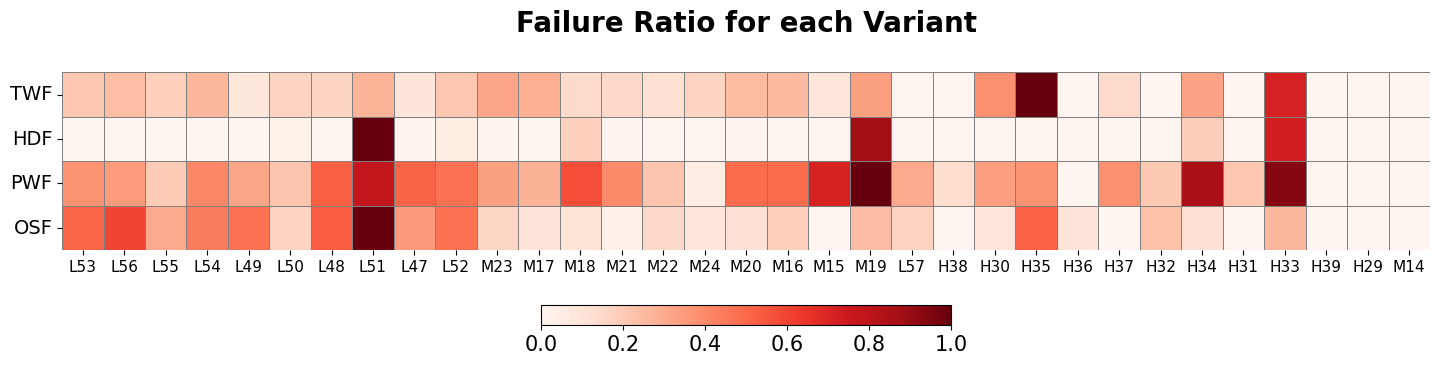

In [58]:
fig, ax = plt.subplots(figsize=(14.5,3.7))

cmap = colors.ListedColormap(sns.color_palette("Reds", 256))
norm = colors.Normalize(vmin=0, vmax=1)

sns.heatmap(heatmap_df_scaled_plot.T, cmap=cmap, norm=norm, cbar=False, ax=ax, linecolor='grey', linewidth='0.5')
ax.set_title('Failure Ratio for each Variant\n', weight='bold', fontsize=20)
ax.set_xlabel('', weight='bold')
ax.set_ylabel('', weight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=14)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,
                    orientation='horizontal', pad=0.2, shrink=0.3)
cbar.set_label('', weight='bold')
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.show()

In [59]:
group_product['unknown'] = group_product['Machine failure'] - (group_product['TWF']+group_product['HDF']
                                                               +group_product['PWF']+group_product['OSF'])
group_product['unknown ratio'] = group_product['unknown'] / group_product['Machine failure']
group_product['unknown ratio'] = group_product['unknown ratio'].apply(lambda x: 0 if pd.isnull(x) or x < 0 else x)
group_product

Product Variant  Count  Machine failure  Machine failure_ratio  TWF  \
0              L53  12028              153               1.272032   20   
1              L56  11535              150               1.300390   22   
2              L55  11494              103               0.896120   16   
3              L54  10579              128               1.209944   22   
4              L49   9979              109               1.092294    7   
5              L50   9249               70               0.756839   12   
6              L48   8471              116               1.369378   11   
7              L51   6999              582               8.315474   15   
8              L47   6748               71               1.052164    5   
9              L52   6624              105               1.585145   11   
10             M23   3963               29               0.731769   10   
11             M17   3545               27               0.761636    8   
12             M18   3467               68               1.961350    4   
13             M21   3343               19               0.568352    4   
14             M22   3054               22               0.720367    3   
15             M24   3052               12               0.393185    4   
16             M20   3047               27               0.886117    6   
17             M16   3022               27               0.893448    6   
18             M15   2798               21               0.750536    2   
19             M19   2657              185               6.962740    7   
20             L57   1648                8               0.485437    0   
21             H38   1225                1               0.081633    0   
22             H30    983               16               1.627670    3   
23             H35    886               12               1.354402    7   
24             H36    874                1               0.114416    0   
25             H37    860                6               0.697674    1   
26             H32    810                7               0.864198    0   
27             H34    779               20               2.567394    2   
28             H31    773                4               0.517464    0   
29             H33    708               46               6.497175    4   
30             H39    664                1               0.150602    0   
31             H29    361                2               0.554017    0   
32             M14    204                0               0.000000    0   

    TWF_ratio  HDF  HDF_ratio  PWF  PWF_ratio  OSF  OSF_ratio  unknown  \
0    0.166279    1   0.008314   27   0.224476   67   0.557034       38   
1    0.190724    0   0.000000   24   0.208062   75   0.650195       29   
2    0.139203    0   0.000000   14   0.121803   38   0.330607       35   
3    0.207959    2   0.018905   26   0.245770   51   0.482087       27   
4    0.070147    0   0.000000   19   0.190400   51   0.511073       32   
5    0.129744   12   0.129744   12   0.129744   17   0.183804       17   
6    0.129855    0   0.000000   27   0.318735   49   0.578444       29   
7    0.214316  435   6.215174   33   0.471496   76   1.085869       23   
8    0.074096    3   0.044458   21   0.311203   26   0.385299       16   
9    0.166063   24   0.362319   19   0.286836   34   0.513285       17   
10   0.252334    1   0.025233    8   0.201867    7   0.176634        3   
11   0.225670    0   0.000000    6   0.169252    4   0.112835        9   
12   0.115374   38   1.096048   12   0.346121    4   0.115374       10   
13   0.119653    1   0.029913    8   0.239306    1   0.029913        5   
14   0.098232    0   0.000000    4   0.130976    5   0.163720       10   
15   0.131062    0   0.000000    1   0.032765    3   0.098296        4   
16   0.196915    1   0.032819    9   0.295372    4   0.131277        7   
17   0.198544    0   0.000000    9   0.297816    6   0.198544        6   
18   0.071480    0   0.000000   12   0.428878    0   0.000000        7   
19   0

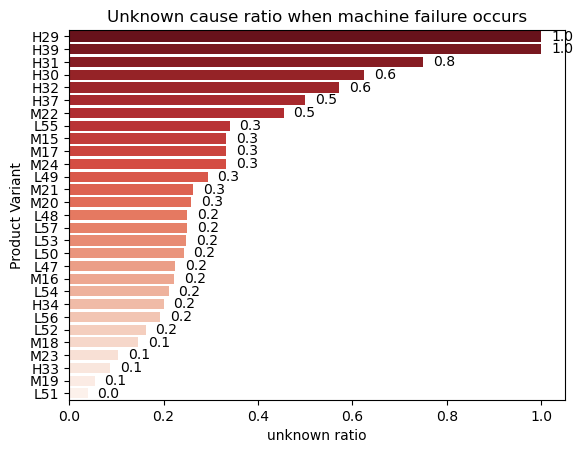

In [60]:
group_product_u = group_product[group_product['unknown ratio']>0]
group_product_u = group_product_u.sort_values('unknown ratio', ascending=False)
bar_plot = sns.barplot(x='unknown ratio', y='Product Variant', data = group_product_u, palette='Reds_r')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.1f'),
                      (p.get_width(), p.get_y()+p.get_height()/2.),
                      ha = 'center', va = 'center',
                      xytext = (15, 0),
                      textcoords = 'offset points')
plt.title('Unknown cause ratio when machine failure occurs')
plt.show()

In [61]:
train_data

Product ID Type  Air temperature [K]  Process temperature [K]  \
id                                                                     
0          L50096    L                300.6                    309.6   
1          M20343    M                302.6                    312.1   
2          L49454    L                299.3                    308.5   
3          L53355    L                301.0                    310.9   
4          M24050    M                298.0                    309.0   
...           ...  ...                  ...                      ...   
136424     M22284    M                300.1                    311.4   
136425     H38017    H                297.5                    308.5   
136426     L54690    L                300.5                    311.8   
136427     L53876    L                301.7                    310.9   
136428     L47937    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
id                                                                            
0                         1596         36.1              140    0    0    0   
1                         1759         29.1              200    0    0    0   
2                         1805         26.5               25    0    0    0   
3                         1524         44.3              197    0    0    0   
4                         1641         35.4               34    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
136424                    1530         37.5              210    0    0    0   
136425                    1447         49.1                2    0    0    0   
136426                    1524         38.5              214    0    0    0   
136427                    1447         46.3               42    0    0    0   
136428                    1557         39.3              229    0    0    0   

        OSF  RNF  
id                
0         0    0  
1         0    0  
2         0    0  
3         0    0  
4         0    0  
...     ...  ...  
136424    0    0  
136425    0    0  
136426    0    0  
136427    0    0  
136428    0    0  

[136429 rows x 12 columns]

In [74]:
train_data['air_process_diff'] = abs(train_data['Air temperature [K]'] - train_data['Process temperature [K]'])
train_data['Power'] = train_data['Rotational speed [rpm]'] * (2*np.pi/60) * train_data['Torque [Nm]']
train_data['Overstrain'] = train_data['Torque [Nm]'] * train_data['Tool wear [min]']
train_data.drop(['RNF'], axis=1, inplace=True)
train_data

Product ID Type  Air temperature [K]  Process temperature [K]  \
id                                                                     
0          L50096    L                300.6                    309.6   
1          M20343    M                302.6                    312.1   
2          L49454    L                299.3                    308.5   
3          L53355    L                301.0                    310.9   
4          M24050    M                298.0                    309.0   
...           ...  ...                  ...                      ...   
136424     M22284    M                300.1                    311.4   
136425     H38017    H                297.5                    308.5   
136426     L54690    L                300.5                    311.8   
136427     L53876    L                301.7                    310.9   
136428     L47937    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
id                                                                              
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  air_process_diff        Power  Overstrain  
id                                                                     
0         0    0    0    0               9.0  6033.491523      5054.0  
1         0    0    0    0               9.5  5360.279633      5820.0  
2         0    0    0    0               9.2  5009.007687       662.5  
3         0    0    0    0               9.9  7069.965771      8727.1  
4         0    0    0    0              11.0  6083.317183      1203.6  
...     ...  ...  ...  ...               ...          ...         ...  
136424    0    0    0    0              11.3  6008.295950      7875.0  
136425    0    0    0    0              11.0  7440.097746        98.2  
136426    0    0    0    0              11.3  6144.326912      8239.0  
136427    0    0    0    0               9.2  7015.815186      1944.6  
136428    0    0    0    0              11.2  6407.812288      8999.7  

[136429 rows x 15 columns]

In [75]:
test_data['air_process_diff'] = abs(test_data['Air temperature [K]'] - test_data['Process temperature [K]'])
test_data['Power'] = test_data['Rotational speed [rpm]'] * (2*np.pi/60) * test_data['Torque [Nm]']
test_data['Overstrain'] = test_data['Torque [Nm]'] * test_data['Tool wear [min]']
test_data.drop(['RNF'], axis=1, inplace=True)
test_data

Product ID Type  Air temperature [K]  Process temperature [K]  \
id                                                                     
136429     L50896    L                302.3                    311.5   
136430     L53866    L                301.7                    311.0   
136431     L50498    L                301.3                    310.4   
136432     M21232    M                300.1                    309.6   
136433     M19751    M                303.4                    312.3   
...           ...  ...                  ...                      ...   
227378     L51130    L                302.3                    311.4   
227379     L47783    L                297.9                    309.8   
227380     L48097    L                295.6                    306.2   
227381     L48969    L                298.1                    307.8   
227382     L52525    L                303.5                    312.8   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
id                                                                            
136429                    1499         38.0               60    0    0    0   
136430                    1713         28.8               17    0    0    0   
136431                    1525         37.7               96    0    0    0   
136432                    1479         47.6                5    0    0    0   
136433                    1515         41.3              114    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
227378                    1484         40.4               15    0    0    0   
227379                    1542         33.8               31    0    0    0   
227380                    1501         41.4              187    0    0    0   
227381                    1534         40.3               69    0    0    0   
227382                    1534         36.1               92    0    0    0   

        OSF  air_process_diff        Power  Overstrain  
id                                                      
136429    0               9.2  5965.046691      2280.0  
136430    0               9.3  5166.286287       489.6  
136431    0               9.1  6020.600521      3619.2  
136432    0               9.5  7372.312648       238.0  
136433    0               8.9  6552.262718      4708.2  
...     ...               ...          ...         ...  
227378    0               9.1  6278.326311       606.0  
227379    0              11.9  5457.951749      1047.8  
227380    0              10.6  6507.432191      7741.8  
227381    0               9.7  6473.796205      2780.7  
227382    0               9.3  5799.107767      3321.2  

[90954 rows x 14 columns]

In [76]:
train_data["product_id_num"] = pd.to_numeric(train_data["Product ID"].str.slice(start=1))
test_data["product_id_num"] = pd.to_numeric(test_data["Product ID"].str.slice(start=1))
train_data

Product ID Type  Air temperature [K]  Process temperature [K]  \
id                                                                     
0          L50096    L                300.6                    309.6   
1          M20343    M                302.6                    312.1   
2          L49454    L                299.3                    308.5   
3          L53355    L                301.0                    310.9   
4          M24050    M                298.0                    309.0   
...           ...  ...                  ...                      ...   
136424     M22284    M                300.1                    311.4   
136425     H38017    H                297.5                    308.5   
136426     L54690    L                300.5                    311.8   
136427     L53876    L                301.7                    310.9   
136428     L47937    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
id                                                                              
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  air_process_diff        Power  Overstrain  \
id                                                                      
0         0    0    0    0               9.0  6033.491523      5054.0   
1         0    0    0    0               9.5  5360.279633      5820.0   
2         0    0    0    0               9.2  5009.007687       662.5   
3         0    0    0    0               9.9  7069.965771      8727.1   
4         0    0    0    0              11.0  6083.317183      1203.6   
...     ...  ...  ...  ...               ...          ...         ...   
136424    0    0    0    0              11.3  6008.295950      7875.0   
136425    0    0    0    0              11.0  7440.097746        98.2   
136426    0    0    0    0              11.3  6144.326912      8239.0   
136427    0    0    0    0               9.2  7015.815186      1944.6   
136428    0    0    0    0              11.2  6407.812288      8999.7   

        product_id_num  
id                      
0                50096  
1                20343  
2                49454  
3                53355  
4                24050  
...                ...  
136424           22284  
136425           38017  
136426           54690  
136427           53876  
136428           47937  

[136429 rows x 16 columns]

In [77]:
train_data.drop(['Product ID'], axis=1, inplace=True)
test_data.drop(['Product ID'], axis=1, inplace=True)

In [78]:
lbl = LabelEncoder()
train_data['Type'] = lbl.fit_transform(train_data['Type'])
test_data['Type'] = lbl.transform(test_data['Type'])
test_data

Type  Air temperature [K]  Process temperature [K]  \
id                                                           
136429     1                302.3                    311.5   
136430     1                301.7                    311.0   
136431     1                301.3                    310.4   
136432     2                300.1                    309.6   
136433     2                303.4                    312.3   
...      ...                  ...                      ...   
227378     1                302.3                    311.4   
227379     1                297.9                    309.8   
227380     1                295.6                    306.2   
227381     1                298.1                    307.8   
227382     1                303.5                    312.8   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
id                                                                            
136429                    1499         38.0               60    0    0    0   
136430                    1713         28.8               17    0    0    0   
136431                    1525         37.7               96    0    0    0   
136432                    1479         47.6                5    0    0    0   
136433                    1515         41.3              114    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
227378                    1484         40.4               15    0    0    0   
227379                    1542         33.8               31    0    0    0   
227380                    1501         41.4              187    0    0    0   
227381                    1534         40.3               69    0    0    0   
227382                    1534         36.1               92    0    0    0   

        OSF  air_process_diff        Power  Overstrain  product_id_num  
id                                                                      
136429    0               9.2  5965.046691      2280.0           50896  
136430    0               9.3  5166.286287       489.6           53866  
136431    0               9.1  6020.600521      3619.2           50498  
136432    0               9.5  7372.312648       238.0           21232  
136433    0               8.9  6552.262718      4708.2           19751  
...     ...               ...          ...         ...             ...  
227378    0               9.1  6278.326311       606.0           51130  
227379    0              11.9  5457.951749      1047.8           47783  
227380    0              10.6  6507.432191      7741.8           48097  
227381    0               9.7  6473.796205      2780.7           48969  
227382    0               9.3  5799.107767      3321.2           52525  

[90954 rows x 14 columns]

In [79]:
y = train_data['Machine failure']
train_data.drop(['Machine failure'], axis=1, inplace=True)

In [82]:
train_data.rename(columns={"Air temperature [K]":"Air temperature",
                     "Process temperature [K]":"Process temperature",
                     "Rotational speed [rpm]":"Rotational speed",
                     "Torque [Nm]":"Torque",
                     "Tool wear [min]":"Tool wear"}, inplace=True)
train_data

Type  Air temperature  Process temperature  Rotational speed  Torque  \
id                                                                             
0          1            300.6                309.6              1596    36.1   
1          2            302.6                312.1              1759    29.1   
2          1            299.3                308.5              1805    26.5   
3          1            301.0                310.9              1524    44.3   
4          2            298.0                309.0              1641    35.4   
...      ...              ...                  ...               ...     ...   
136424     2            300.1                311.4              1530    37.5   
136425     0            297.5                308.5              1447    49.1   
136426     1            300.5                311.8              1524    38.5   
136427     1            301.7                310.9              1447    46.3   
136428     1            296.9                308.1              1557    39.3   

        Tool wear  TWF  HDF  PWF  OSF  air_process_diff        Power  \
id                                                                     
0             140    0    0    0    0               9.0  6033.491523   
1             200    0    0    0    0               9.5  5360.279633   
2              25    0    0    0    0               9.2  5009.007687   
3             197    0    0    0    0               9.9  7069.965771   
4              34    0    0    0    0              11.0  6083.317183   
...           ...  ...  ...  ...  ...               ...          ...   
136424        210    0    0    0    0              11.3  6008.295950   
136425          2    0    0    0    0              11.0  7440.097746   
136426        214    0    0    0    0              11.3  6144.326912   
136427         42    0    0    0    0               9.2  7015.815186   
136428        229    0    0    0    0              11.2  6407.812288   

        Overstrain  product_id_num  
id                                  
0           5054.0           50096  
1           5820.0           20343  
2            662.5           49454  
3           8727.1           53355  
4           1203.6           24050  
...            ...             ...  
136424      7875.0           22284  
136425        98.2           38017  
136426      8239.0           54690  
136427      1944.6           53876  
136428      8999.7           47937  

[136429 rows x 14 columns]

In [83]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, y, train_size=0.75, test_size=0.25, random_state=0, shuffle=True)
X_train

Type  Air temperature  Process temperature  Rotational speed  Torque  \
id                                                                             
70139      1            299.8                310.3              1427    36.4   
76714      1            301.6                310.5              1418    40.3   
83639      1            298.3                309.7              1484    39.2   
130124     1            299.1                308.5              1587    33.7   
78861      1            299.0                310.0              1412    46.7   
...      ...              ...                  ...               ...     ...   
41993      1            298.2                307.9              1510    47.9   
97639      2            297.4                308.7              1798    36.2   
95939      1            301.8                310.9              1359    54.6   
117952     2            298.1                310.2              1517    40.7   
43567      1            299.8                309.2              1616    31.2   

        Tool wear  TWF  HDF  PWF  OSF  air_process_diff        Power  \
id                                                                     
70139           0    0    0    0    0              10.5  5439.437296   
76714         192    0    0    0    0               8.9  5984.252294   
83639         173    0    0    0    0              11.4  6091.841371   
130124        180    0    0    0    0               9.4  5600.611471   
78861          89    0    0    0    0              11.0  6905.262540   
...           ...  ...  ...  ...  ...               ...          ...   
41993           2    0    0    0    0               9.7  7574.275168   
97639         135    0    0    0    0              11.3  6815.957533   
95939         182    0    0    0    1               9.1  7770.352438   
117952        148    0    0    0    0              12.1  6465.596649   
43567         175    0    0    0    0               9.4  5279.886277   

        Overstrain  product_id_num  
id                                  
70139          0.0           54519  
76714       7737.6           50508  
83639       6781.6           55690  
130124      6066.0           49569  
78861       4156.3           56888  
...            ...             ...  
41993         95.8           48970  
97639       4887.0           23604  
95939       9937.2           50705  
117952      6023.6           15482  
43567       5460.0           49927  

[102321 rows x 14 columns]

In [84]:
conf_matrix = eval_model(model, X_train, y_train, X_valid, y_valid)
conf_matrix

matrice de confusion: [[33551    11]
 [  110   436]]MCC: 0.8808836050448793


In [96]:
model_3 = XGBClassifier(n_estimators = 1200, learning_rate = 0.05)
conf_matrix = eval_model(model_3, X_train, y_train, X_valid, y_valid)
conf_matrix

[0]	validation_0-logloss:0.64511


C:\Users\user\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-logloss:0.02055
[200]	validation_0-logloss:0.01832
[300]	validation_0-logloss:0.01828
[400]	validation_0-logloss:0.01828
[460]	validation_0-logloss:0.01840
matrice de confusion: [[33554     8]
 [  111   435]]MCC: 0.8828678946757326


In [98]:
train_data['air_process_diff'] = abs(train_data['Air temperature [K]'] - train_data['Process temperature [K]'])
train_data['speed_power'] = train_data['Rotational speed [rpm]'] * (2 * np.pi / 60) / (train_data['Rotational speed [rpm]']
                                                                                   * (2 * np.pi / 60) * train_data['Torque [Nm]'])
train_data['torque_power'] = train_data['Torque [Nm]'] / (train_data['Rotational speed [rpm]'] * 
                                                      (2 * np.pi / 60) * train_data['Torque [Nm]'])
train_data["tool_process"]=train_data["Tool wear [min]"] * train_data["Process temperature [K]"]
train_data["temp_ratio"] = train_data["Process temperature [K]"] / train_data["Air temperature [K]"]
train_data.drop(['RNF'], axis=1, inplace=True)
train_data["product_id_num"] = pd.to_numeric(train_data["Product ID"].str.slice(start=1))
train_data.drop(['Product ID'], axis=1, inplace=True)
train_data['Type'] = lbl.fit_transform(train_data['Type'])
y = train_data['Machine failure']
train_data.drop(['Machine failure'], axis=1, inplace=True)
train_data.rename(columns={"Air temperature [K]":"Air temperature",
                     "Process temperature [K]":"Process temperature",
                     "Rotational speed [rpm]":"Rotational speed",
                     "Torque [Nm]":"Torque",
                     "Tool wear [min]":"Tool wear"}, inplace=True)
train_data

Type  Air temperature  Process temperature  Rotational speed  Torque  \
id                                                                             
0          1            300.6                309.6              1596    36.1   
1          2            302.6                312.1              1759    29.1   
2          1            299.3                308.5              1805    26.5   
3          1            301.0                310.9              1524    44.3   
4          2            298.0                309.0              1641    35.4   
...      ...              ...                  ...               ...     ...   
136424     2            300.1                311.4              1530    37.5   
136425     0            297.5                308.5              1447    49.1   
136426     1            300.5                311.8              1524    38.5   
136427     1            301.7                310.9              1447    46.3   
136428     1            296.9                308.1              1557    39.3   

        Tool wear  TWF  HDF  PWF  OSF  air_process_diff  speed_power  \
id                                                                     
0             140    0    0    0    0               9.0     0.027701   
1             200    0    0    0    0               9.5     0.034364   
2              25    0    0    0    0               9.2     0.037736   
3             197    0    0    0    0               9.9     0.022573   
4              34    0    0    0    0              11.0     0.028249   
...           ...  ...  ...  ...  ...               ...          ...   
136424        210    0    0    0    0              11.3     0.026667   
136425          2    0    0    0    0              11.0     0.020367   
136426        214    0    0    0    0              11.3     0.025974   
136427         42    0    0    0    0               9.2     0.021598   
136428        229    0    0    0    0              11.2     0.025445   

        torque_power  tool_process  temp_ratio  product_id_num  
id                                                              
0           0.005983       43344.0    1.029940           50096  
1           0.005429       62420.0    1.031395           20343  
2           0.005290        7712.5    1.030738           49454  
3           0.006266       61247.3    1.032890           53355  
4           0.005819       10506.0    1.036913           24050  
...              ...           ...         ...             ...  
136424      0.006241       65394.0    1.037654           22284  
136425      0.006599         617.0    1.036975           38017  
136426      0.006266       66725.2    1.037604           54690  
136427      0.006599       13057.8    1.030494           53876  
136428      0.006133       70554.9    1.037723           47937  

[136429 rows x 16 columns]

In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, y, train_size=0.75, test_size=0.25, random_state=0, shuffle=True)
X_train

Type  Air temperature  Process temperature  Rotational speed  Torque  \
id                                                                             
70139      1            299.8                310.3              1427    36.4   
76714      1            301.6                310.5              1418    40.3   
83639      1            298.3                309.7              1484    39.2   
130124     1            299.1                308.5              1587    33.7   
78861      1            299.0                310.0              1412    46.7   
...      ...              ...                  ...               ...     ...   
41993      1            298.2                307.9              1510    47.9   
97639      2            297.4                308.7              1798    36.2   
95939      1            301.8                310.9              1359    54.6   
117952     2            298.1                310.2              1517    40.7   
43567      1            299.8                309.2              1616    31.2   

        Tool wear  TWF  HDF  PWF  OSF  air_process_diff  speed_power  \
id                                                                     
70139           0    0    0    0    0              10.5     0.027473   
76714         192    0    0    0    0               8.9     0.024814   
83639         173    0    0    0    0              11.4     0.025510   
130124        180    0    0    0    0               9.4     0.029674   
78861          89    0    0    0    0              11.0     0.021413   
...           ...  ...  ...  ...  ...               ...          ...   
41993           2    0    0    0    0               9.7     0.020877   
97639         135    0    0    0    0              11.3     0.027624   
95939         182    0    0    0    1               9.1     0.018315   
117952        148    0    0    0    0              12.1     0.024570   
43567         175    0    0    0    0               9.4     0.032051   

        torque_power  tool_process  temp_ratio  product_id_num  
id                                                              
70139       0.006692           0.0    1.035023           54519  
76714       0.006734       59616.0    1.029509           50508  
83639       0.006435       53578.1    1.038217           55690  
130124      0.006017       55530.0    1.031428           49569  
78861       0.006763       27590.0    1.036789           56888  
...              ...           ...         ...             ...  
41993       0.006324         615.8    1.032529           48970  
97639       0.005311       41674.5    1.037996           23604  
95939       0.007027       56583.8    1.030152           50705  
117952      0.006295       45909.6    1.040590           15482  
43567       0.005909       54110.0    1.031354           49927  

[102321 rows x 16 columns]

In [100]:
model_3 = XGBClassifier(n_estimators = 1200, learning_rate = 0.05)
conf_matrix = eval_model(model_3, X_train, y_train, X_valid, y_valid)
conf_matrix

[0]	validation_0-logloss:0.64511


C:\Users\user\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-logloss:0.02046
[200]	validation_0-logloss:0.01818
[300]	validation_0-logloss:0.01812
[400]	validation_0-logloss:0.01806
[497]	validation_0-logloss:0.01822
matrice de confusion: [[33554     8]
 [  111   435]]MCC: 0.8828678946757326
